In [118]:
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy import special
import math
import matplotlib.pyplot as plt
import corner
import img2pdf
from PIL import Image
import os

data_m33 = np.genfromtxt("m33_data.dat", dtype=None) # data from M33
data_2403 = np.genfromtxt("ngc2403_data.dat", dtype=None)# data from NGC 2403
data_3198 = np.genfromtxt("ngc3198_data.dat", dtype=None)# data from NGC 3198

# Outline:

### 1) Import Data and Define Models

### 2) Fit Data Using scipy curve_fit
    i) DM Model
    ii) MOND Model
    iii) Chi-Squared Table
### 3) MCMC
    i) DM Model
        a) Define Functions
        b) Run Calculations
    ii) MOND Model
        a) Define Functions
        b) Run Calculations
        c) Analysis on acrit
### 4) Cross-Validation

# 
# 

In [2]:
# import fonts for graphs:

import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [144]:
# Set standard for graphs:

import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.figsize' : (9, 6),
    'font.family': 'Tahoma',  # specify the default font family
    'font.size': 12,  # specify the default font size
    #'axes.labelweight': 'bold',  # bolden the axis labels
    'axes.labelsize' : 12,
    'axes.linewidth': 1.5,  # increase the axis linewidth
    #'axes.titleweight': 'bold',  # bolden the plot title
    'axes.titlesize': 14,  # set the plot title size
    'axes.titlepad': 12,  # set the plot title padding
    'xtick.major.width': 1.5,  # increase the width of the x-axis major ticks
    'xtick.minor.width': 1.5,  # increase the width of the x-axis minor ticks
    'ytick.major.width': 1.5,  # increase the width of the y-axis major ticks
    'ytick.minor.width': 1.5,  # increase the width of the y-axis minor ticks
    'xtick.labelsize': 12,  # set the font size of the x-axis tick labels
    'ytick.labelsize': 12,  #set the font size of the y-axis tick labels
    'xtick.direction': 'in',  # set the x-axis tick direction to inward
    'ytick.direction': 'in',  # set the y-axis tick direction to inward
    'xtick.major.pad': 8,  # set the padding of the x-axis major ticks
    'ytick.major.pad': 8,  # set the padding of the y-axis major ticks
    'axes.labelpad': 12,  # set the padding of the axis labels
})


In [4]:
data_m33[:,2]

array([ 2.500168 ,  2.1093655,  3.28124  ,  4.45311  ,  4.9999825,
        4.374982 ,  3.046865 ,  2.03106  ,  3.437485 ,  2.265617 ,
        3.281235 ,  2.96874  ,  4.218555 ,  4.140785 ,  4.53105  ,
        4.374805 ,  4.6873   ,  5.781225 ,  7.49997  , 12.3437   ])

### Plot Data For M33:

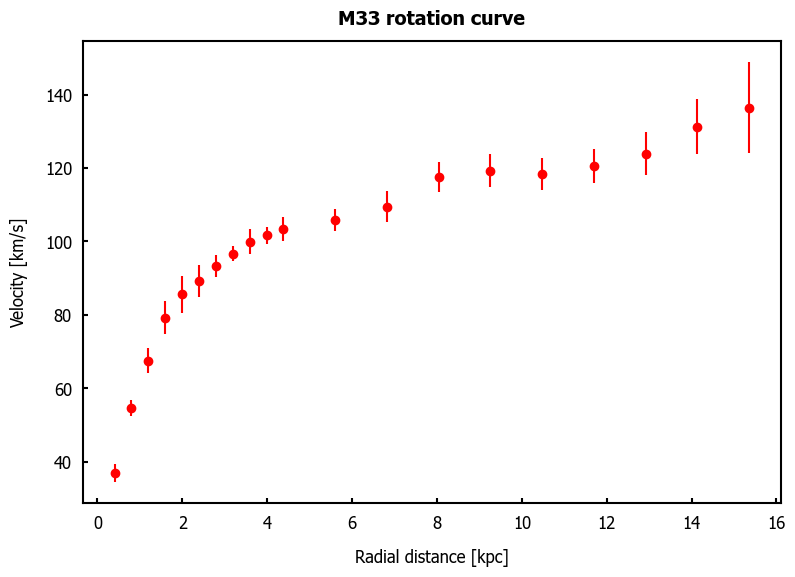

In [5]:
%matplotlib inline

plt.figure()
plt.errorbar(data_m33[:,0], data_m33[:,1], yerr=data_m33[:,2],fmt='ro')
plt.title("M33 rotation curve")
plt.xlabel('Radial distance [kpc]')
plt.ylabel('Velocity [km/s]')
plt.show()

## Import SPARC Data:

zip file from Newtonian Mass Models. Website: http://astroweb.cwru.edu/SPARC/

#### NGC 300

In [6]:
file = open('Rotmod_LTG/NGC0300_rotmod.dat')

In [7]:
lst = []
for line in file:
    lst += [line.split()]
    
vdata_300 = []
rdata_300 = []
err_300 = []

for i, l in enumerate(lst):
    if i >= 3:
        #print(l)
        rdata_300 = np.append(rdata_300, float(l[0]))
        vdata_300 = np.append(vdata_300, float(l[1]))
        err_300 = np.append(err_300, float(l[2]))

Text(0.5, 1.0, 'NGC 300')

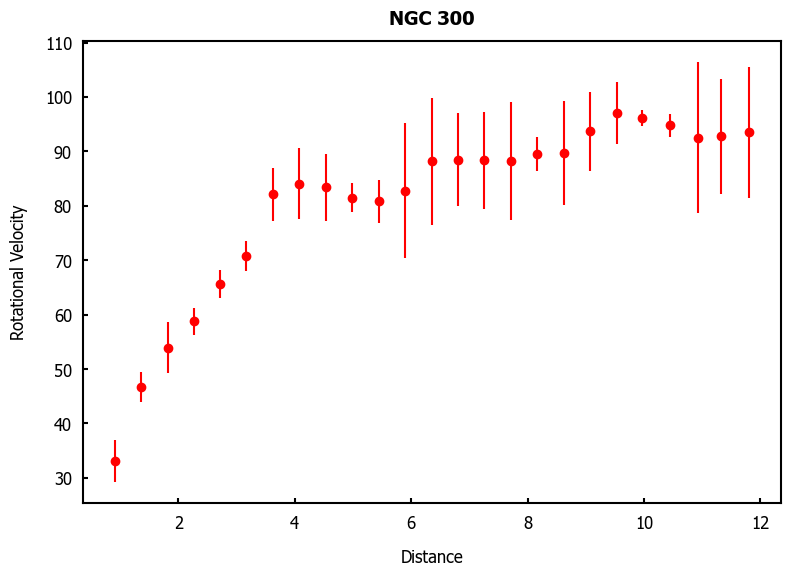

In [8]:
plt.errorbar(rdata_300, vdata_300, err_300, fmt='o', c='r')
plt.xlabel('Distance')
plt.ylabel('Rotational Velocity')
plt.title('NGC 300')

#### NGC 0024

Text(0.5, 1.0, 'NGC 0024')

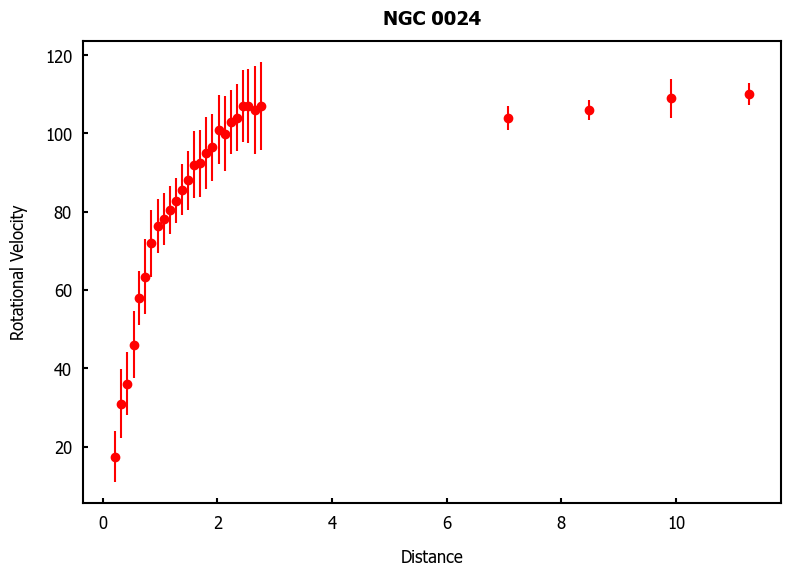

In [9]:
file = open('Rotmod_LTG/NGC0024_rotmod.dat')

lst = []
for line in file:
    lst += [line.split()]
    
vdata_24 = []
rdata_24 = []
err_24 = []

for i, l in enumerate(lst):
    if i >= 3:
        #print(l)
        rdata_24 = np.append(rdata_24, float(l[0]))
        vdata_24 = np.append(vdata_24, float(l[1]))
        err_24 = np.append(err_24, float(l[2]))

plt.errorbar(rdata_24, vdata_24, err_24, fmt='o', c='r')
plt.xlabel('Distance')
plt.ylabel('Rotational Velocity')
plt.title('NGC 0024')

#### NGC 1003

Text(0.5, 1.0, 'NGC 1003')

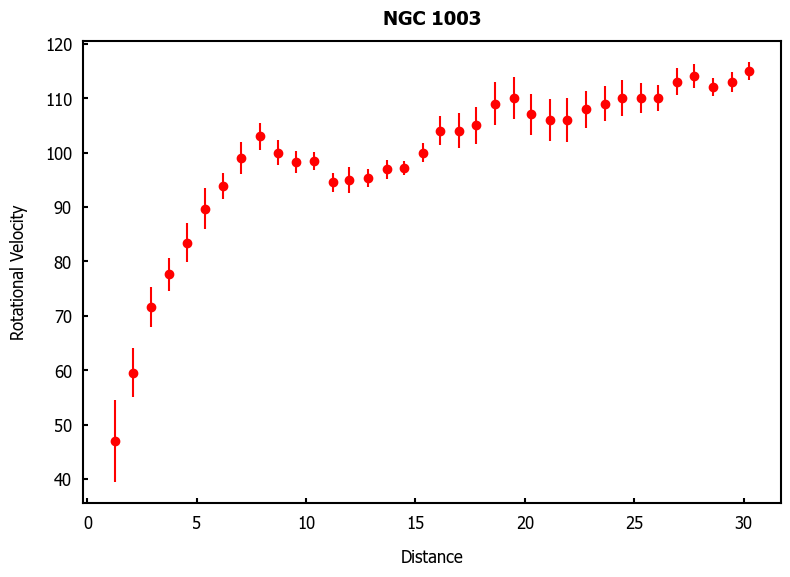

In [10]:
file = open('Rotmod_LTG/NGC1003_rotmod.dat')

lst = []
for line in file:
    lst += [line.split()]
    
vdata_2976 = []
rdata_2976 = []
err_2976 = []

for i, l in enumerate(lst):
    if i >= 3:
        #print(l)
        rdata_2976 = np.append(rdata_2976, float(l[0]))
        vdata_2976 = np.append(vdata_2976, float(l[1]))
        err_2976 = np.append(err_2976, float(l[2]))

plt.errorbar(rdata_2976, vdata_2976, err_2976, fmt='o', c='r')
plt.xlabel('Distance')
plt.ylabel('Rotational Velocity')
plt.title('NGC 1003')

#### NGC 2903

Text(0.5, 1.0, 'NGC 2903')

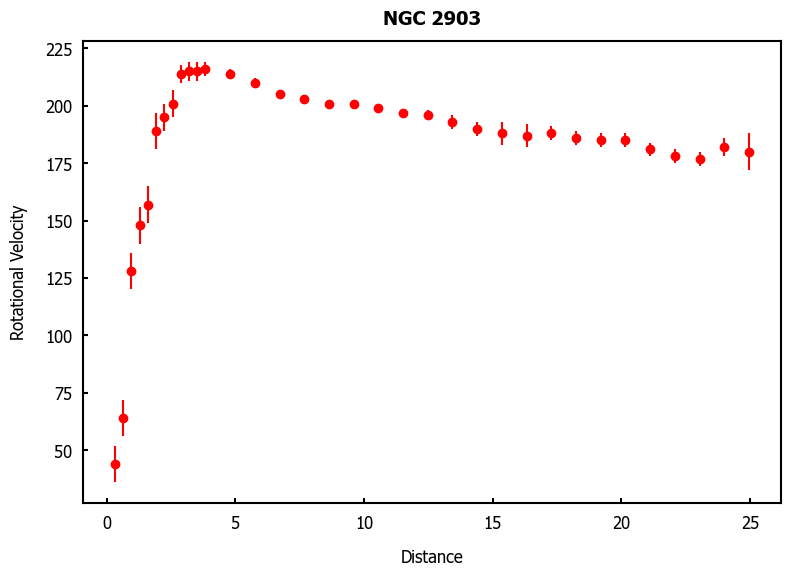

In [11]:
file = open('Rotmod_LTG/NGC2903_rotmod.dat')

lst = []
for line in file:
    lst += [line.split()]
    
vdata_2903 = []
rdata_2903 = []
err_2903 = []

for i, l in enumerate(lst):
    if i >= 3:
        #print(l)
        rdata_2903 = np.append(rdata_2903, float(l[0]))
        vdata_2903 = np.append(vdata_2903, float(l[1]))
        err_2903 = np.append(err_2903, float(l[2]))

plt.errorbar(rdata_2903, vdata_2903, err_2903, fmt='o', c='r')
plt.xlabel('Distance')
plt.ylabel('Rotational Velocity')
plt.title('NGC 2903')

#### NGC 2998

Text(0.5, 1.0, 'NGC 2988')

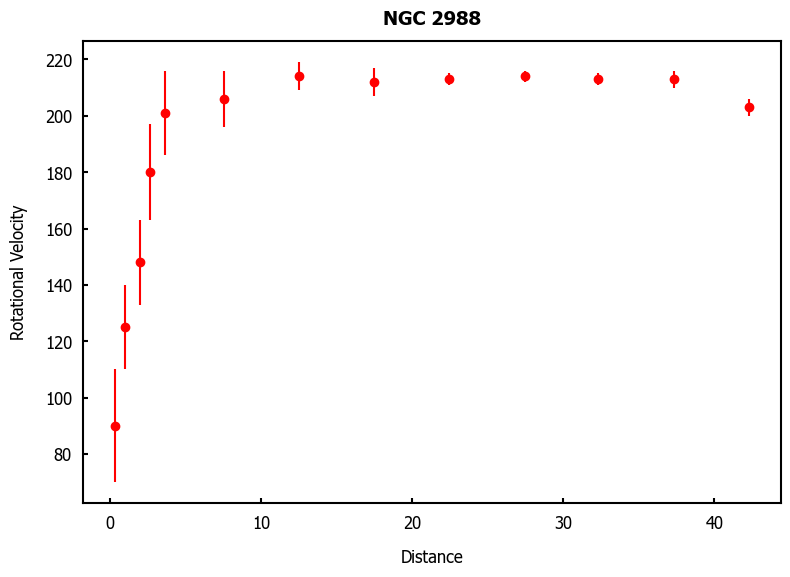

In [12]:
file = open('Rotmod_LTG/NGC2998_rotmod.dat')

lst = []
for line in file:
    lst += [line.split()]
    
vdata_2998 = []
rdata_2998 = []
err_2998 = []

for i, l in enumerate(lst):
    if i >= 3:
        #print(l)
        rdata_2998 = np.append(rdata_2998, float(l[0]))
        vdata_2998 = np.append(vdata_2998, float(l[1]))
        err_2998 = np.append(err_2998, float(l[2]))

plt.errorbar(rdata_2998, vdata_2998, err_2998, fmt='o', c='r')
plt.xlabel('Distance')
plt.ylabel('Rotational Velocity')
plt.title('NGC 2988')

### 

#### NGC 2915

Text(0.5, 1.0, 'NGC 2915')

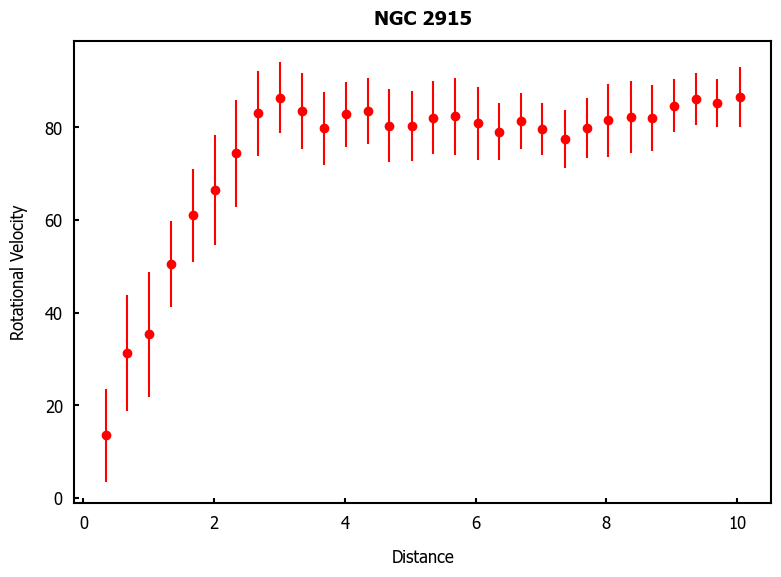

In [13]:
file = open('Rotmod_LTG/NGC2915_rotmod.dat')

lst = []
for line in file:
    lst += [line.split()]
    
vdata_55 = []
rdata_55 = []
err_55 = []

for i, l in enumerate(lst):
    if i >= 3:
        #print(l)
        rdata_55 = np.append(rdata_55, float(l[0]))
        vdata_55 = np.append(vdata_55, float(l[1]))
        err_55 = np.append(err_55, float(l[2]))

plt.errorbar(rdata_55, vdata_55, err_55, fmt='o', c='r')
plt.xlabel('Distance')
plt.ylabel('Rotational Velocity')
plt.title('NGC 2915')

### 

# Model Definitions:

## Dark Matter:

In [14]:
# This is the exponential thin disk model of Freeman (1970)
def diskmodel(R,Rdisk,Mdisk):
    kpc=3.08567758149137e+19
    Grv=6.67408e-11
    GMSun=1.98855e39 # Mdisk is inputted in Giga Solar Masses, and converted to SI here
    rel=np.zeros([len(R)])
    B=np.zeros([len(R)])
    Vdisk=np.zeros([len(R)])
    for i in range(len(R)):
        rel[i] = R[i]/Rdisk
        B[i] = (special.i0(0.5*rel[i]))*(special.k0(0.5*rel[i])) - (special.i1(0.5*rel[i]))*(special.k1(0.5*rel[i]))
        #print(( B[i]*rel[i]**2*Grv*Mdisk*GMSun )/( 2.0*Rdisk*kpc ))
        Vdisk[i] = 1e-3*np.sqrt( ( B[i]*rel[i]**2*Grv*Mdisk*GMSun )/( 2.0*Rdisk*kpc ) ) # Vdisk is outputted in km/s
    return Vdisk

In [15]:
# This is the Navarro, Frenk & White (1996) (NFW) halo profile
def halomodel(R,Rhalo,Mhalo):
    kpc=3.08567758149137e+19
    Grv=6.67408e-11
    GMSun=1.98855e39 # Mhalo is inputted in Giga Solar Masses, and converted to SI here
    rhohalo = 0.4120043135770753*(Mhalo*GMSun)/((Rhalo*kpc)**3) #0.412 comes from 1/2.4272 just below Eqn 17 of Sofue 2013
    rel=np.zeros([len(R)])
    Mhalo=np.zeros([len(R)])
    Vhalo=np.zeros([len(R)])
    for i in range(len(R)):
        rel[i] = R[i]/Rhalo
        Mhalo[i] = 4.0*np.pi*rhohalo*(Rhalo*kpc)**3*( np.log(1.0+rel[i]) - rel[i]/(1.0+rel[i]) ) # Eqn 17 of Sofue 2013
        Vhalo[i] = 1e-3*np.sqrt( Grv*Mhalo[i]/(R[i]*kpc) ) # Vhalo is outputted in km/s, eqn 18 of Sofue 2013
    return Vhalo

In [16]:
# This simply adds the two velocity components together in quadrature
def rotnmodel(R,Rdisk,Mdisk,Rhalo,Mhalo):
    Vrot=np.zeros([len(R)])
    Vdisk=np.zeros([len(R)])
    Vhalo=np.zeros([len(R)])
    Vdisk=diskmodel(R,Rdisk,Mdisk)
    Vhalo=halomodel(R,Rhalo,Mhalo)
    for i in range(len(R)):
        if np.isnan(Vdisk[i]):
            print('Vdisk error')
        if np.isnan(Vhalo[i]):
            print('Vhalo error')
        Vrot[i] = np.sqrt( Vdisk[i]**2 + Vhalo[i]**2 )
    return Vrot

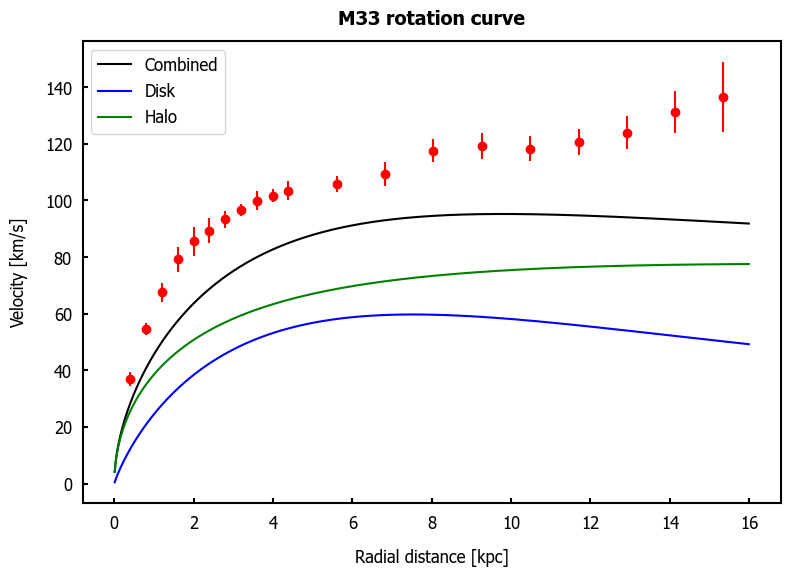

In [17]:
# define a high density list of R values to use
Rdense = np.arange(0.01,16,0.01)

# choose some inputs
Mdisk_test = 7.5 # Mass of the disk, in Giga-Solar-masses
Rdisk_test = 3.5 # Radius-scale parameter of the disk, in kilo-parsecs
Mhalo_test = 10.0 # Mass of the halo, in Giga-Solar-masses
Rhalo_test = 8.0 # Radius-scale parameter of the halo, in kilo-parsecs

# now just write out the equation derived in class
diskcurve = diskmodel(Rdense,Rdisk_test,Mdisk_test)
halocurve = halomodel(Rdense,Rhalo_test,Mhalo_test)
rotncurve = rotnmodel(Rdense,Rdisk_test,Mdisk_test,Rhalo_test,Mhalo_test)

plt.figure()
plt.errorbar(data_m33[:,0], data_m33[:,1], yerr=data_m33[:,2],fmt='ro')
plt.title("M33 rotation curve")
plt.xlabel('Radial distance [kpc]')
plt.ylabel('Velocity [km/s]')
plt.plot(Rdense, rotncurve,'k-', label='Combined')
plt.plot(Rdense, diskcurve,'b-', label='Disk')
plt.plot(Rdense, halocurve,'g-', label='Halo')
plt.legend()
plt.show()

### 

## MOND

In [18]:
# MOND model usin g
def mondmodel(R,Rdisk,Mdisk,acrit):
    kpc=3.08567758149137e+19
    Grv=6.67408e-11
    GMSun=1.98855e39 # Mdisk is inputted in Giga Solar Masses, and converted to SI here
    afac=1.0e-10     # acrit is inputted in 10^(-8)*cm/s^2, this converts to SI
    rel=np.zeros([len(R)])
    B=np.zeros([len(R)])
    gnewt=np.zeros([len(R)])
    gmond=np.zeros([len(R)])
    Vmond=np.zeros([len(R)])
    for i in range(len(R)):
        rel[i] = R[i]/Rdisk
        B[i] = (special.i0(0.5*rel[i]))*(special.k0(0.5*rel[i])) - (special.i1(0.5*rel[i]))*(special.k1(0.5*rel[i]))
        gnewt[i] = ((Grv*Mdisk*GMSun)/(2.0*Rdisk*R[i]*kpc**2))*rel[i]**2*B[i]
        gmond[i] = np.sqrt( gnewt[i]**2 + np.sqrt( gnewt[i]**2*(4.0*(acrit*afac)**2+gnewt[i]**2) ) )/np.sqrt(2.0)
        Vmond[i] = 1e-3*np.sqrt( gmond[i]*R[i]*kpc ) # Vmond is outputted in km/s
    return Vmond

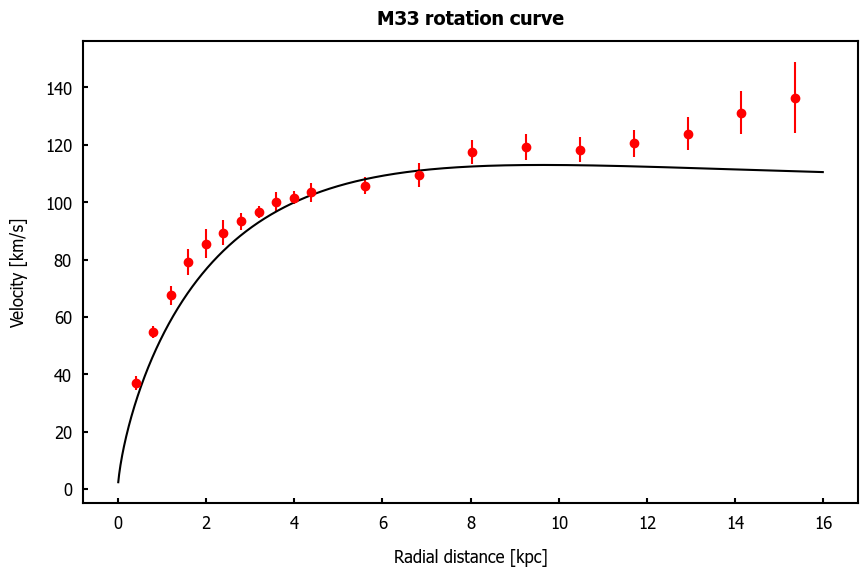

In [19]:
# define a high density list of R values to use
Rdense = np.arange(0.01,16,0.01)

# choose some inputs
Mdisk_test = 7.5   # Mass of the disk, in Giga-Solar-masses
Rdisk_test = 2.3   # Radius-scale parameter of the disk, in kilo-parsecs
acrit_test = 1.3   # Critical gravity, in cm/s * 10^-8

# now just write out the equation derived in class
mondcurve = mondmodel(Rdense,Rdisk_test,Mdisk_test,acrit_test)

plt.figure(figsize=(10,6))
plt.errorbar(data_m33[:,0], data_m33[:,1], yerr=data_m33[:,2],fmt='ro')
plt.title("M33 rotation curve")
plt.xlabel('Radial distance [kpc]')
plt.ylabel('Velocity [km/s]')
plt.plot(Rdense, mondcurve,'k-')
plt.show()

### 

# 2) Initial Fitting Using curve_fit:

## i) Dark Matter:

In [20]:
# write a function to make this easier to repeat for many galaxies later

def chi2_dm_1(r_data, v_data, err_data):
    '''
    Calculates the best fit parameters and chi-squared for the DM model,
    given a certain galaxy.
    
    Args:
        v_data(arr) : radial velocities
        r_data(arr) : distances
        err_data(arr) : errors on velocities
        Rdisk(int) : disk radius guess
        Mdisk(arr) : disk mass guess
        
    Returns:
        params (arr) : Array whose elements are the best fitting
        halo and disk radius and mass, respectively.
        
        chi2 (int) : chi-squared of the fit
    '''
    
    # Calculate best fit parameters
    p = [[0.25, 2.5, 2.5, 4], [10, 24, 24, 30]] # bounds
    params,_ = curve_fit(rotnmodel, r_data, v_data, sigma=err_data, bounds = p) #, p0=[Rdisk, Mdisk, Rhalo, Mhalo], bounds=p)
    
    # Calculate chi-squared
    chi2 = 0.0
    model = rotnmodel(r_data, params[0], params[1], params[2], params[3])
    for i in np.arange(0, len(r_data)):
        res = v_data[i] - model[i] # residuals
        chi2 += (res/err_data[i])**2
    
    return params, chi2

#### M33:

In [21]:
params_m33_dm, chi2_m33_dm = chi2_dm_1(data_m33[:,0], data_m33[:,1], data_m33[:,2])

In [22]:
print(f'chi-squared : {chi2_m33_dm}')
print(f'params : {params_m33_dm}')

chi-squared : 12.983577340030227
params : [10.          2.5         7.62822786 23.53653471]


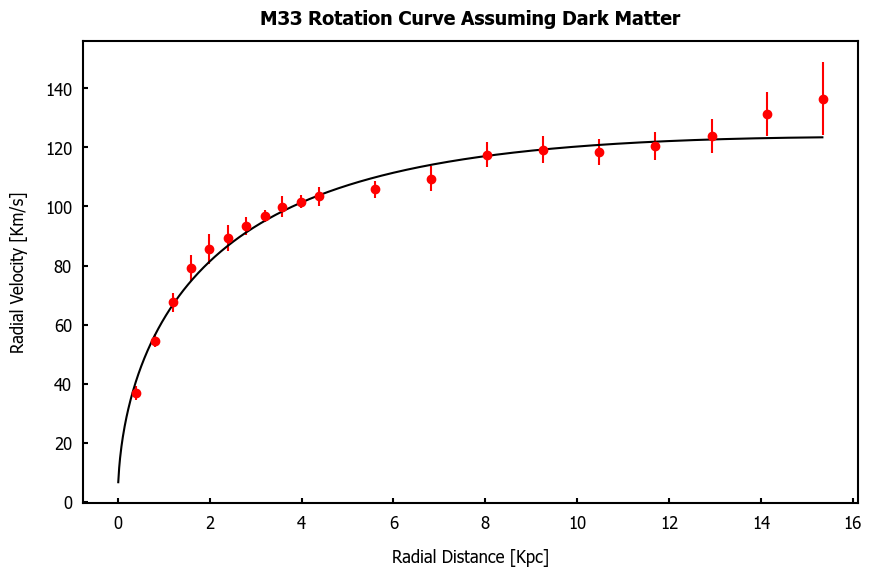

In [23]:
fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(data_m33[:,0], data_m33[:,1], yerr=data_m33[:,2], fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,data_m33[:,0][-1],0.01)
ax.plot(Rdense, rotnmodel(Rdense, params_m33_dm[0], params_m33_dm[1], params_m33_dm[2], params_m33_dm[3]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('M33 Rotation Curve Assuming Dark Matter')
plt.show()

#### NGC 2403:

In [24]:
params_2403, chi2_2403_dm = chi2_dm_1(data_2403[:,0], data_2403[:,1], data_2403[:,2])

In [25]:
print(f'chi-squared : {chi2_2403_dm}')

chi-squared : 30.116945384869247


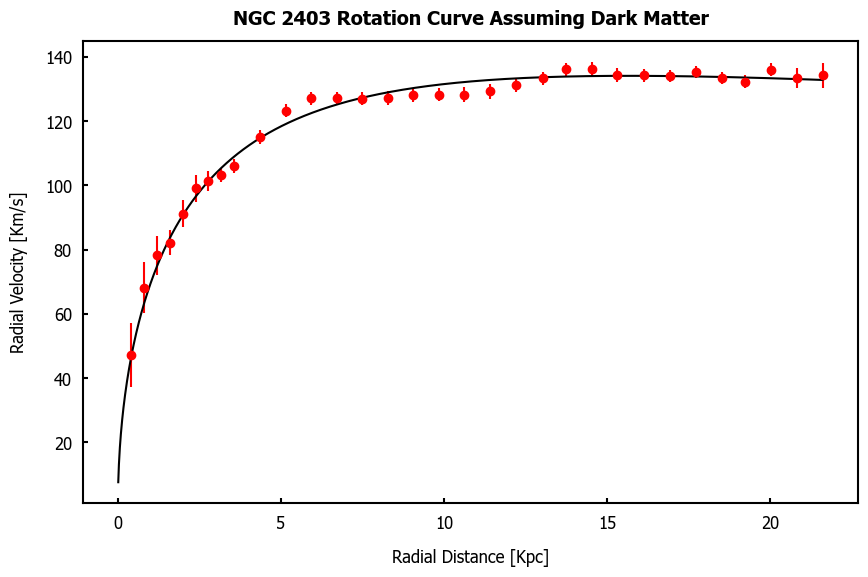

In [26]:
fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(data_2403[:,0], data_2403[:,1], yerr=data_2403[:,2], fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,data_2403[:,0][-1],0.01)
ax.plot(Rdense, rotnmodel(Rdense, params_2403[0], params_2403[1], params_2403[2], params_2403[3]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 2403 Rotation Curve Assuming Dark Matter')
plt.show()

#### NGC 3198:

In [27]:
params_3198_dm, chi2_3198_dm = chi2_dm_1(data_3198[:,0], data_3198[:,1], data_3198[:,2])

In [28]:
print(f'chi-squared : {chi2_3198_dm}')
print(f'parameters : {params_3198_dm}')

chi-squared : 39.29269091956545
parameters : [ 2.54777007  5.85727752  6.65331164 30.        ]


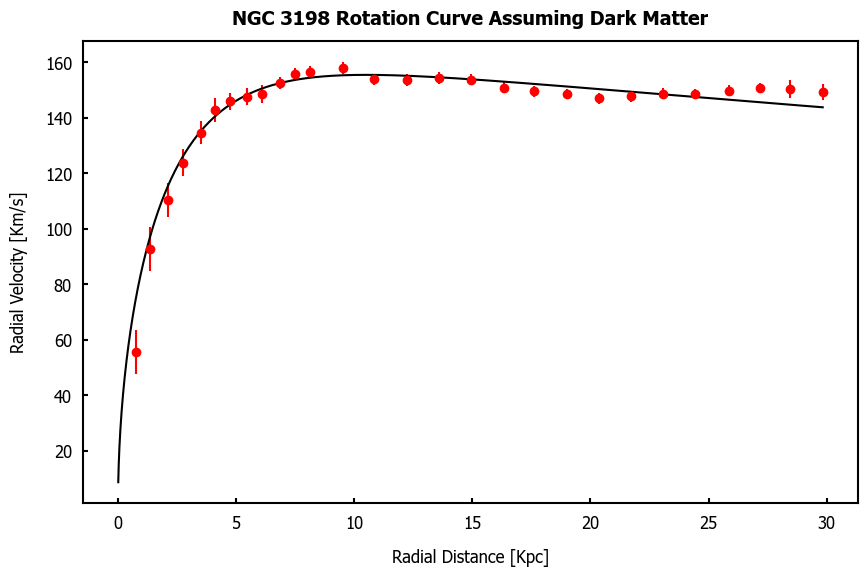

In [29]:
fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(data_3198[:,0], data_3198[:,1], yerr=data_3198[:,2], fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,data_3198[:,0][-1],0.01)
ax.plot(Rdense, rotnmodel(Rdense, params_3198_dm[0], params_3198_dm[1], params_3198_dm[2], params_3198_dm[3]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 3198 Rotation Curve Assuming Dark Matter')
plt.show()

#### NGC 300

chi-squared : 9.332852133071329
parameters : [ 3.66197094  8.66900989 18.96821994 30.        ]


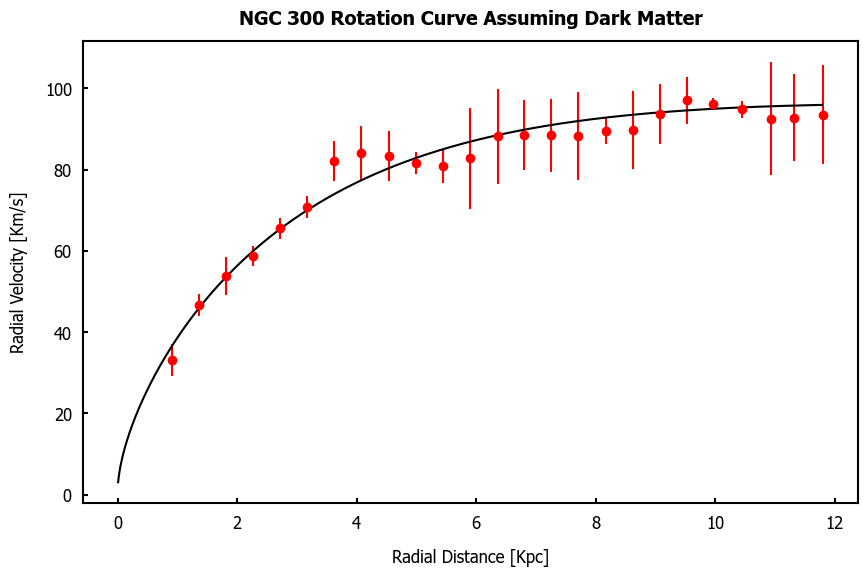

In [30]:
params_300_dm, chi2_300_dm = chi2_dm_1(rdata_300, vdata_300, err_300)

print(f'chi-squared : {chi2_300_dm}')
print(f'parameters : {params_300_dm}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_300, vdata_300, yerr=err_300, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_300[-1],0.01)
ax.plot(Rdense, rotnmodel(Rdense, params_300_dm[0], params_300_dm[1], params_300_dm[2], params_300_dm[3]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 300 Rotation Curve Assuming Dark Matter')
plt.show()

#### NGC 24

chi-squared : 10.150975895990278
parameters : [ 1.36539743  5.83092656 13.48266969 30.        ]


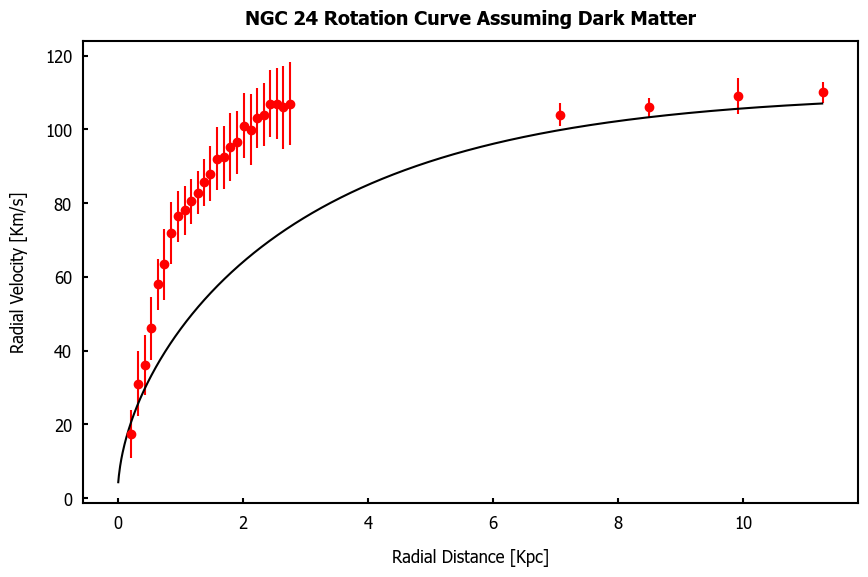

In [31]:
params_24_dm, chi2_24_dm = chi2_dm_1(rdata_24, vdata_24, err_24)

print(f'chi-squared : {chi2_24_dm}')
print(f'parameters : {params_24_dm}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_24, vdata_24, yerr=err_24, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_24[-1],0.01)
ax.plot(Rdense, rotnmodel(Rdense, params_300_dm[0], params_24_dm[1], params_24_dm[2], params_24_dm[3]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 24 Rotation Curve Assuming Dark Matter')
plt.show()

#### NGC 1003

chi-squared : 172.0991273144802
parameters : [10.          2.5        12.78108009 30.        ]


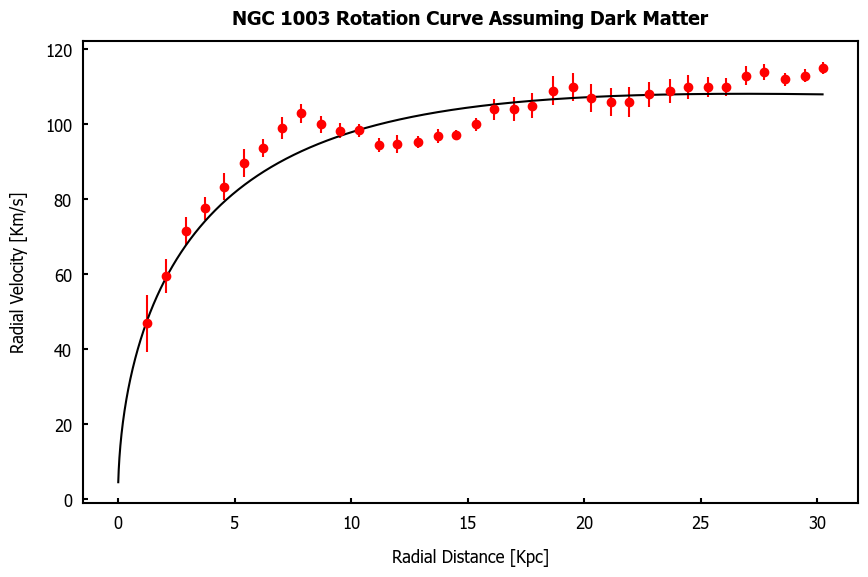

In [32]:
params_2976_dm, chi2_2976_dm = chi2_dm_1(rdata_2976, vdata_2976, err_2976)

print(f'chi-squared : {chi2_2976_dm}')
print(f'parameters : {params_2976_dm}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_2976, vdata_2976, yerr=err_2976, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_2976[-1],0.01)
ax.plot(Rdense, rotnmodel(Rdense, params_2976_dm[0], params_2976_dm[1], params_2976_dm[2], params_2976_dm[3]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 1003 Rotation Curve Assuming Dark Matter')
plt.show()

#### NGC 2903

chi-squared : 120.53328092873808
parameters : [ 1.50660406 15.90649675  4.51847571 30.        ]


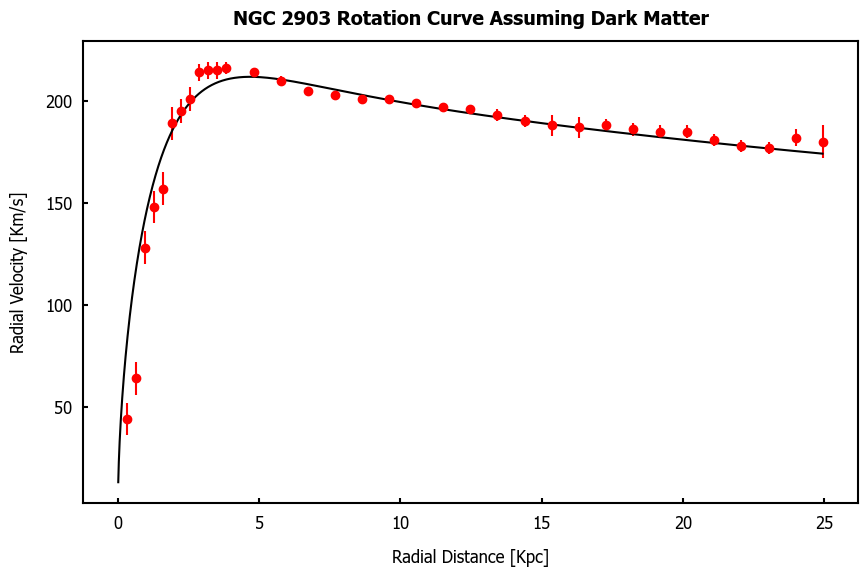

In [33]:
params_2903_dm, chi2_2903_dm = chi2_dm_1(rdata_2903, vdata_2903, err_2903)

print(f'chi-squared : {chi2_2903_dm}')
print(f'parameters : {params_2903_dm}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_2903, vdata_2903, yerr=err_2903, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_2903[-1],0.01)
ax.plot(Rdense, rotnmodel(Rdense, params_2903_dm[0], params_2903_dm[1], params_2903_dm[2], params_2903_dm[3]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 2903 Rotation Curve Assuming Dark Matter')
plt.show()

#### NGC 2998

chi-squared : 275.78354624415704
parameters : [ 9.14006596 23.9999996   2.5        30.        ]


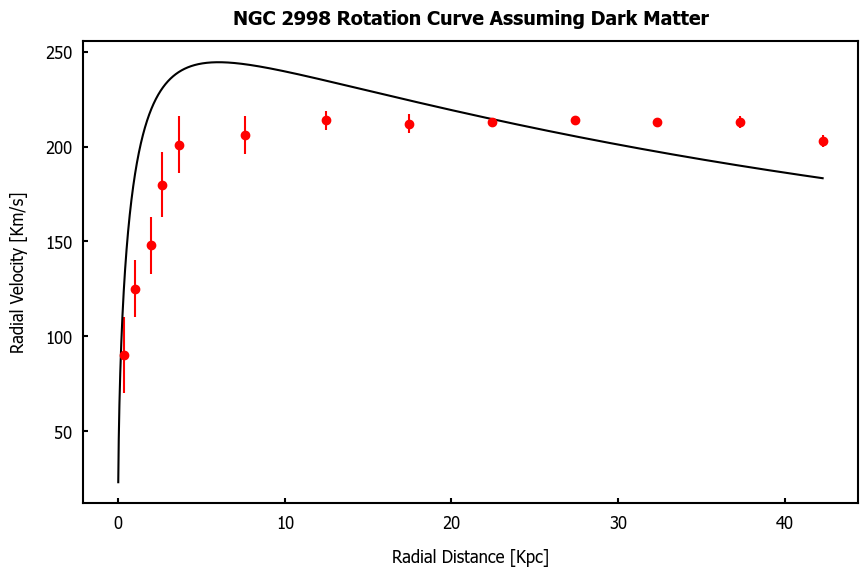

In [34]:
params_2998_dm, chi2_2998_dm = chi2_dm_1(rdata_2998, vdata_2998, err_2998)

print(f'chi-squared : {chi2_2998_dm}')
print(f'parameters : {params_2998_dm}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_2998, vdata_2998, yerr=err_2998, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_2998[-1],0.01)
ax.plot(Rdense, rotnmodel(Rdense, params_2998_dm[0], params_2998_dm[1], params_2998_dm[2], params_2998_dm[3]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 2998 Rotation Curve Assuming Dark Matter')
plt.show()

#### NGC 2915

chi-squared : 9.50990702240078
parameters : [ 1.75550921  4.19479497 20.30505365 30.        ]


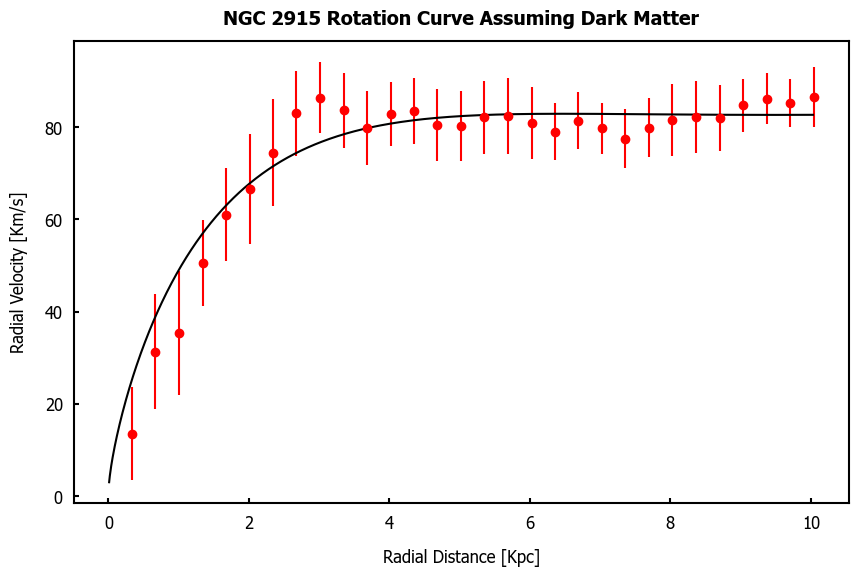

In [35]:
params_55_dm, chi2_55_dm = chi2_dm_1(rdata_55, vdata_55, err_55)

print(f'chi-squared : {chi2_55_dm}')
print(f'parameters : {params_55_dm}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_55, vdata_55, yerr=err_55, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_55[-1],0.01)
ax.plot(Rdense, rotnmodel(Rdense, params_55_dm[0], params_55_dm[1], params_55_dm[2], params_55_dm[3]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 2915 Rotation Curve Assuming Dark Matter')
plt.show()

# 

## ii) MOND:

In [36]:

def chi2_mond_1(r_data, v_data, err_data):
    '''
    Calculates the best fit parameters and chi-squared for the MOND model,
    given a certain galaxy.
    
    Args:
        v_data(arr) : radial velocities
        r_data(arr) : distances
        err_data(arr) : errors on velocities
        Rdisk(int) : disk radius guess
        Mdisk(arr) : disk mass guess
        acrit(int) : acrit guess
        
    Returns:
        params (arr) : Array whose elements are the best fitting
        disk radius and mass, respectively.
        
        chi2 (int) : chi-squared of the fit
    '''
    
    # Calculate best fit parameters
    p = [[0.0, 0.0 , 0.0], [10, 200, 10]] # bounds
    params,_ = curve_fit(mondmodel, r_data, v_data, sigma=err_data, bounds = p)
    
    # Calculate chi-squared
    chi2 = 0.0
    model = mondmodel(r_data, params[0], params[1], params[2])
    for i in np.arange(0, len(r_data)):
        res = v_data[i] - model[i] # residuals
        chi2 += (res/err_data[i])**2
    
    return params, chi2

#### M33:

In [37]:
acrit = 1.3
params_m33_mond, chi2_m33_mond = chi2_mond_1(data_m33[:,0], data_m33[:,1], data_m33[:,2])

In [38]:
print(f'chi-squared : {chi2_m33_mond}')
print(f'parameters : {params_m33_mond}')

chi-squared : 32.53234828589381
parameters : [ 1.9409089  1.1391275 10.       ]


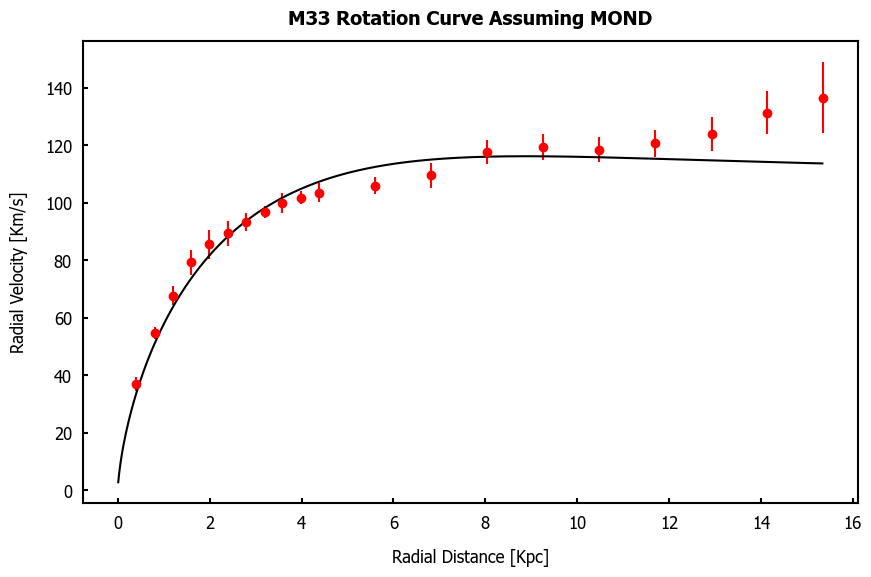

In [39]:
fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(data_m33[:,0], data_m33[:,1], yerr=data_m33[:,2], fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,data_m33[:,0][-1],0.01)
ax.plot(Rdense, mondmodel(Rdense, params_m33_mond[0], params_m33_mond[1], params_m33_mond[2]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('M33 Rotation Curve Assuming MOND')
plt.show()

#### NGC 2403:

In [40]:
acrit = 1.3
params_2403_mond, chi2_2403_mond = chi2_mond_1(data_2403[:,0], data_2403[:,1], data_2403[:,2])

In [41]:
print(f'chi-squared : {chi2_2403_mond}')
print(f'parameters : {params_2403_mond}')

chi-squared : 76.2079261027884
parameters : [ 2.46877717  2.02477755 10.        ]


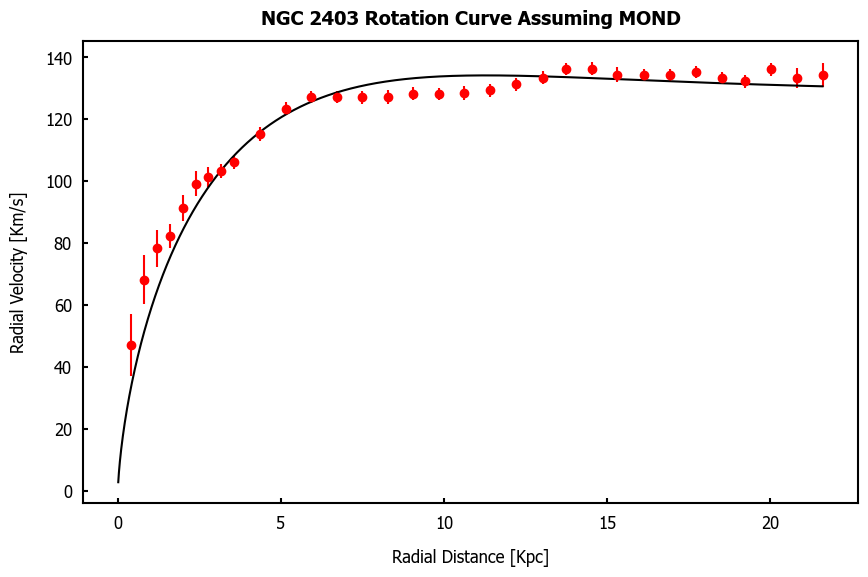

In [42]:
fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(data_2403[:,0], data_2403[:,1], yerr=data_2403[:,2], fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,data_2403[:,0][-1],0.01)
ax.plot(Rdense, mondmodel(Rdense, params_2403_mond[0], params_2403_mond[1], params_2403_mond[2]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 2403 Rotation Curve Assuming MOND')
plt.show()

#### NGC 3198:

In [43]:
acrit = 1.3
params_3198_mond, chi2_3198_mond = chi2_mond_1(data_3198[:,0], data_3198[:,1], data_3198[:,2])

In [44]:
print(f'chi-squared : {chi2_3198_mond}')
print(f'parameters : {params_3198_mond}')

chi-squared : 12.801132654615234
parameters : [ 2.15051044 12.46245574  2.82278005]


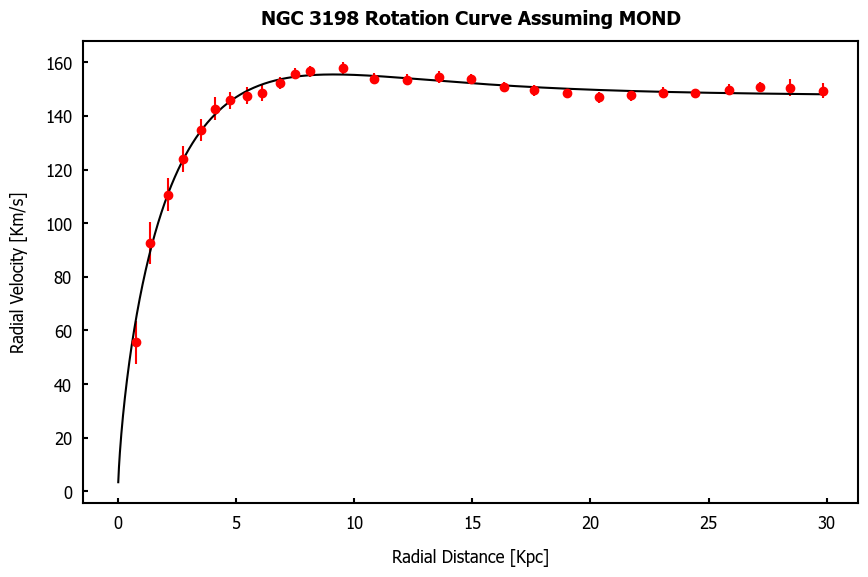

In [45]:
fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(data_3198[:,0], data_3198[:,1], yerr=data_3198[:,2], fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,data_3198[:,0][-1],0.01)
ax.plot(Rdense, mondmodel(Rdense, params_3198_mond[0], params_3198_mond[1], params_3198_mond[2]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 3198 Rotation Curve Assuming MOND')
plt.show()

#### NGC 300

chi-squared : 9.106028921633873
parameters : [3.08626869 7.40103401 0.67938487]


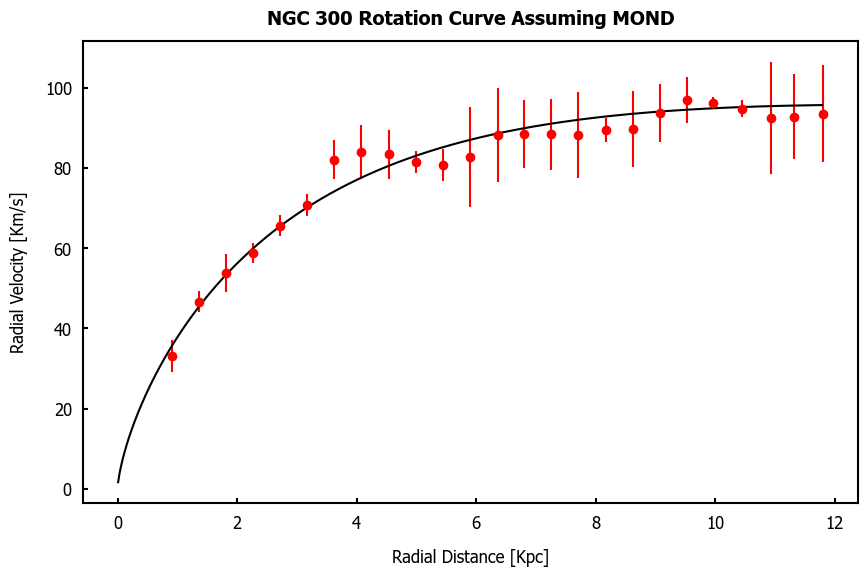

In [46]:
acrit = 1.3
params_300_mond, chi2_300_mond = chi2_mond_1(rdata_300, vdata_300, err_300)

print(f'chi-squared : {chi2_300_mond}')
print(f'parameters : {params_300_mond}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_300, vdata_300, yerr=err_300, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_300[-1],0.01)
ax.plot(Rdense, mondmodel(Rdense, params_300_mond[0], params_300_mond[1], params_300_mond[2]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 300 Rotation Curve Assuming MOND')
plt.show()

#### NGC 24

chi-squared : 12.337066274016896
parameters : [1.4291014  7.82815551 1.01114949]


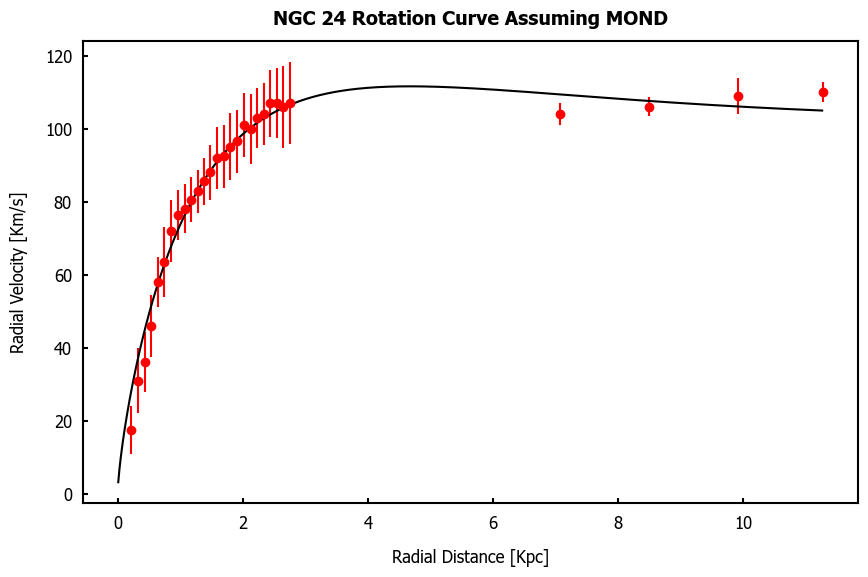

In [47]:
acrit = 1.3
params_24_mond, chi2_24_mond = chi2_mond_1(rdata_24, vdata_24, err_24)

print(f'chi-squared : {chi2_24_mond}')
print(f'parameters : {params_24_mond}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_24, vdata_24, yerr=err_24, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_24[-1],0.01)
ax.plot(Rdense, mondmodel(Rdense, params_24_mond[0], params_24_mond[1], params_24_mond[2]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 24 Rotation Curve Assuming MOND')
plt.show()

#### NGC 1003

chi-squared : 284.6820224424388
parameters : [4.79315318 4.38921418 1.95974255]


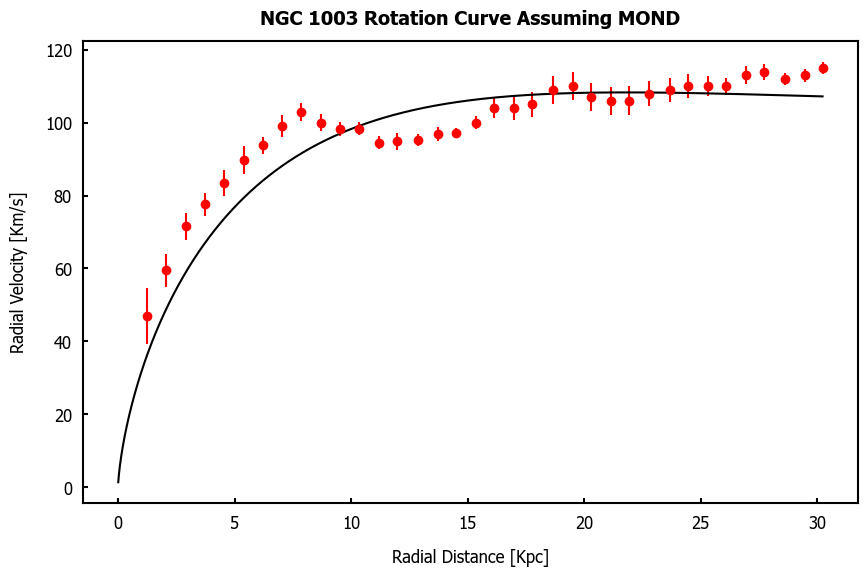

In [48]:
acrit = 1.3
params_2976_mond, chi2_2976_mond = chi2_mond_1(rdata_2976, vdata_2976, err_2976)

print(f'chi-squared : {chi2_2976_mond}')
print(f'parameters : {params_2976_mond}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_2976, vdata_2976, yerr=err_2976, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_2976[-1],0.01)
ax.plot(Rdense, mondmodel(Rdense, params_2976_mond[0], params_2976_mond[1], params_2976_mond[2]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 1003 Rotation Curve Assuming MOND')
plt.show()

#### NGC 2903

chi-squared : 86.11438242797887
parameters : [ 1.78268424 43.50761793  1.87956996]


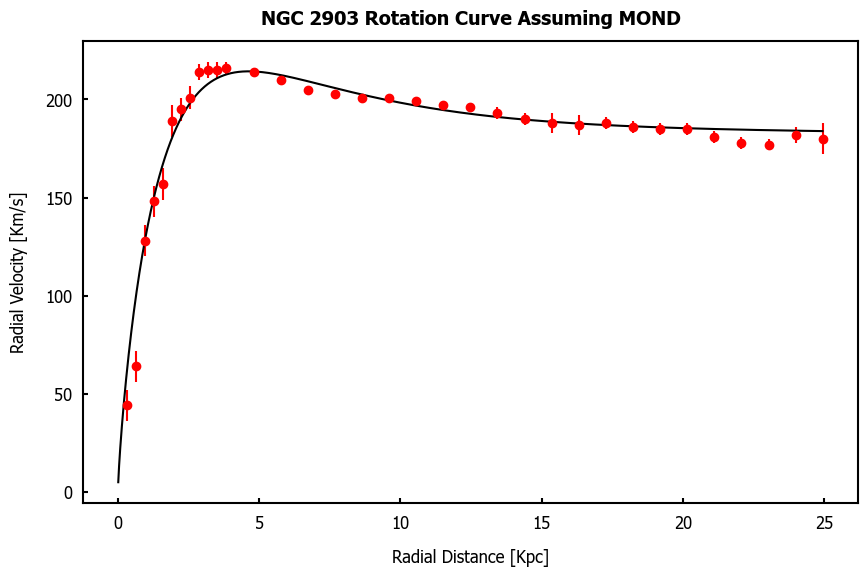

In [49]:
acrit = 1.3
params_2903_mond, chi2_2903_mond = chi2_mond_1(rdata_2903, vdata_2903, err_2903)

print(f'chi-squared : {chi2_2903_mond}')
print(f'parameters : {params_2903_mond}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_2903, vdata_2903, yerr=err_2903, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_2903[-1],0.01)
ax.plot(Rdense, mondmodel(Rdense, params_2903_mond[0], params_2903_mond[1], params_2903_mond[2]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 2903 Rotation Curve Assuming MOND')
plt.show()

#### NGC 2998

chi-squared : 16.193303008038907
parameters : [ 1.80796278 14.81054684 10.        ]


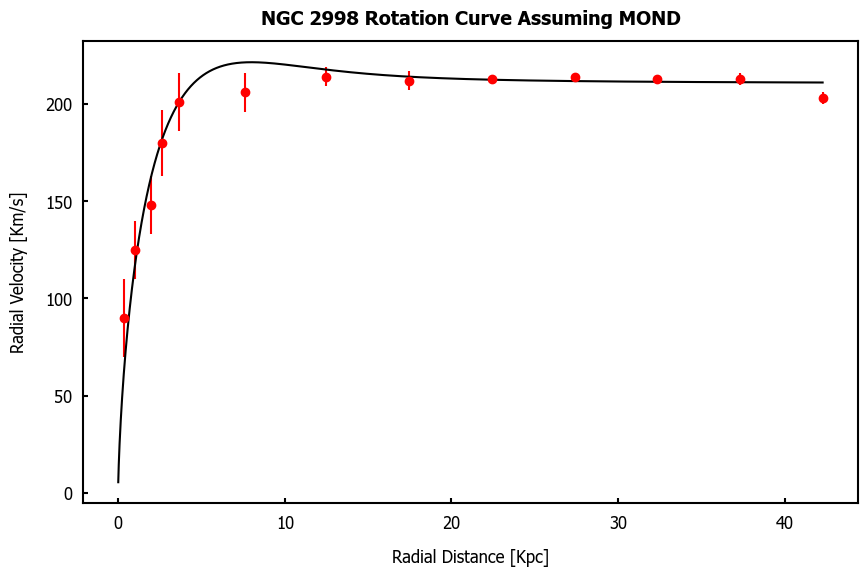

In [50]:
acrit = 1.3
params_2998_mond, chi2_2998_mond = chi2_mond_1(rdata_2998, vdata_2998, err_2998)

print(f'chi-squared : {chi2_2998_mond}')
print(f'parameters : {params_2998_mond}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_2998, vdata_2998, yerr=err_2998, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_2998[-1],0.01)
ax.plot(Rdense, mondmodel(Rdense, params_2998_mond[0], params_2998_mond[1], params_2998_mond[2]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 2998 Rotation Curve Assuming MOND')
plt.show()

#### NGC 2915

chi-squared : 9.942135079206645
parameters : [1.99813232 6.65813096 0.35208794]


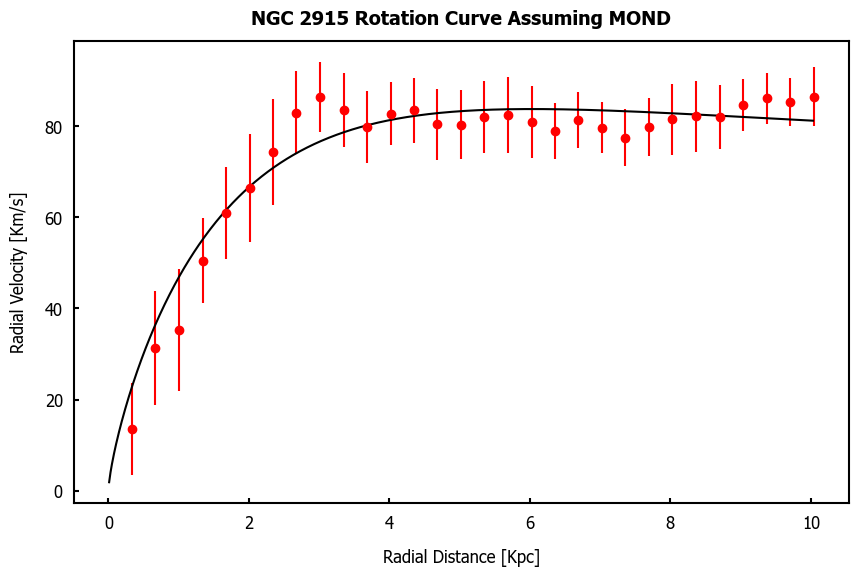

In [51]:
acrit = 1.3
params_55_mond, chi2_55_mond = chi2_mond_1(rdata_55, vdata_55, err_55)

print(f'chi-squared : {chi2_55_mond}')
print(f'parameters : {params_55_mond}')

fig, ax = plt.subplots(1, figsize=(10,6))

# plot data
ax.errorbar(rdata_55, vdata_55, yerr=err_55, fmt='o', c='r')

# plot curve
Rdense = np.arange(0.01,rdata_55[-1],0.01)
ax.plot(Rdense, mondmodel(Rdense, params_55_mond[0], params_55_mond[1], params_55_mond[2]), c='black')

# style graph
ax.set_xlabel('Radial Distance [Kpc]')
ax.set_ylabel('Radial Velocity [Km/s]')
ax.set_title('NGC 2915 Rotation Curve Assuming MOND')
plt.show()

### iii) Chi-Squared Table

In [116]:
# Print chi-squared values in a table:

import pandas as pd

chi2_table = [['---','DM', 'MOND'],
              ['M33', chi2_m33_dm, chi2_m33_mond],
              ['NGC 2403', chi2_2403_dm, chi2_2403_mond],
              ['NGC 3198', chi2_3198_dm, chi2_3198_mond],
              ['NGC 0300', chi2_300_dm, chi2_300_mond],
              ['NGC 0024', chi2_24_dm, chi2_24_mond],
              ['NGC 2976', chi2_2976_dm, chi2_2976_mond],
              ['NGC 2903', chi2_2903_dm, chi2_2903_mond],
              ['NGC 2998', chi2_2998_dm, chi2_2998_mond],
              ['NGC 0055', chi2_55_dm, chi2_55_mond]]
print(" ------- CHI-SQUARED TABLE --------")
print(pd.DataFrame(chi2_table))

 ------- CHI-SQUARED TABLE --------
          0           1           2
0       ---          DM        MOND
1       M33   12.983577   32.532348
2  NGC 2403   30.116945   76.207926
3  NGC 3198   39.292691   12.801133
4  NGC 0300    9.332852    9.106029
5  NGC 0024   10.150976   12.337066
6  NGC 2976  172.099127  284.682022
7  NGC 2903  120.533281   86.114382
8  NGC 2998  275.783546   16.193303
9  NGC 0055    9.509907    9.942135


### 

# 3) MCMC:

## i) For DM

### a) Define necessary functions:

In [53]:
def chi2_dm(x, y, err, Rd, Md, Rh, Mh):
    # Calculate chi-squared
    chi2 = 0.0
    model = rotnmodel(x, Rd, Md, Rh, Mh)
    for i in np.arange(0, len(y)):
        # residuals:
        if np.isnan(model[i]):
#            print('model error')
#            print(Rd, Md, Rh, Mh)
#            print(model)
             pass
            
        res = y[i] - model[i] 
        chi2 += (res/err[i])**2
    return chi2

In [54]:
def log_prior(params):
    '''
    Calculates the log prior, with
    the assumption that the prior 
    is log uniform.
    
    Args:
        params (arr) : array of free parameters, 
        [Rdisk, Mdisk, Rhalo, Mhalo]
        
    Returns:
        lp (int) : log-prior for the given parameters
        
    '''
    
    # log prior for disk radius -- log-uniform from 0 to 50 
    dr = params[0] # value of disk radius
    if dr <= 0 or dr >= 50:
        return - np.inf
    else:
        dr_min = .5
        dr_max = 50
        c = 1/np.log(dr_max/dr_min)
        drp = np.log(c/(dr))
    
    
    
    # log prior for disk mass -- log-uniform from 0 to 3000
    dm = params[1] # value of disk mass
    if dm <= 0 or dm >= 3000:
        return - np.inf
    else:
        dm_min = .5
        dm_max = 3000
        c = 1/np.log(dm_max/dm_min)
        dmp = np.log(c/(dm)) 



    # log prior for halo radius -- log-uniform from 0 to 500
    hr = params[2] # value of halo radius
    if hr <= 0 or hr >= 500:
        return - np.inf
    else:
        hr_min = .5
        hr_max = 500
        c = 1/np.log(hr_max/hr_min)
        hrp = np.log(c/(hr)) 
    

    
    # log prior for halo mass -- log-uniform from 0 to 10000
    hm = params[3] # value of halo mass
    
    if hm <= 0 or hm >= 10000:
        return - np.inf
    else:
        hm_min = .5
        hm_max = 10000
        c = 1/np.log(hm_max/hm_min)
        hmp = np.log(c/(hm))
        # Penalization for large halo mass
        if hm > 1000:
            hmp -= (hm - 1000)**2 / 1000
    
    # sum of the priors for all free parameters
    lp = drp + dmp + hrp + hmp
    return lp

In [55]:
def log_like(params, r_data, v_data, err):
    '''
    Calculates the log-likelihood value for 
    a given temperature and log factor
    
    Args:
        params (arr) : array of free parameters, [Rdisk, Mdisk, Rhalo, Mhalo]
        
        r_data (arr) : array of radius data
        
        v_data (arr) : array of velocity data
        
        err (arr) : estimated error
    
    Returns:
        log_like (int) : value of the log-likelihood given the parameters and data
    '''
    if params[0] < 0.5 or params[1] < 0.5 or params[2] < 0.5 or params[3] < 0.5:
        return -np.inf
    if params[0] > 50 or params[1] > 3000 or params[2] > 500 or params[3] > 10000:
        return -np.inf
    c2 = chi2_dm(r_data, v_data, err, params[0], params[1], params[2], params[3])
    return -0.5*(c2)

In [56]:
def log_post(params, x, y, err):
    if np.isnan(log_like(params, x, y, err)):
#        print('like error')
         pass
    if np.isnan(log_prior(params)):
#        print('prior error')
         pass
    return log_like(params, x, y, err) + log_prior(params)

### b) Run Calculations:

#### NGC 3198:

In [58]:
import emcee

nwalkers = 25
ndim =  4
pos = [[np.random.normal(params_3198_dm[0], 0.25), \
        np.random.normal(params_3198_dm[1], 0.5), \
        np.random.normal(params_3198_dm[2], 0.5), \
        np.random.normal(params_3198_dm[3], 8)] for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_post, \
    args=(data_3198[:,0], data_3198[:,1], data_3198[:,2])
)

sampler.run_mcmc(pos, 5000, progress=True);

100%|███████████████████████████████████████| 5000/5000 [01:51<00:00, 44.73it/s]


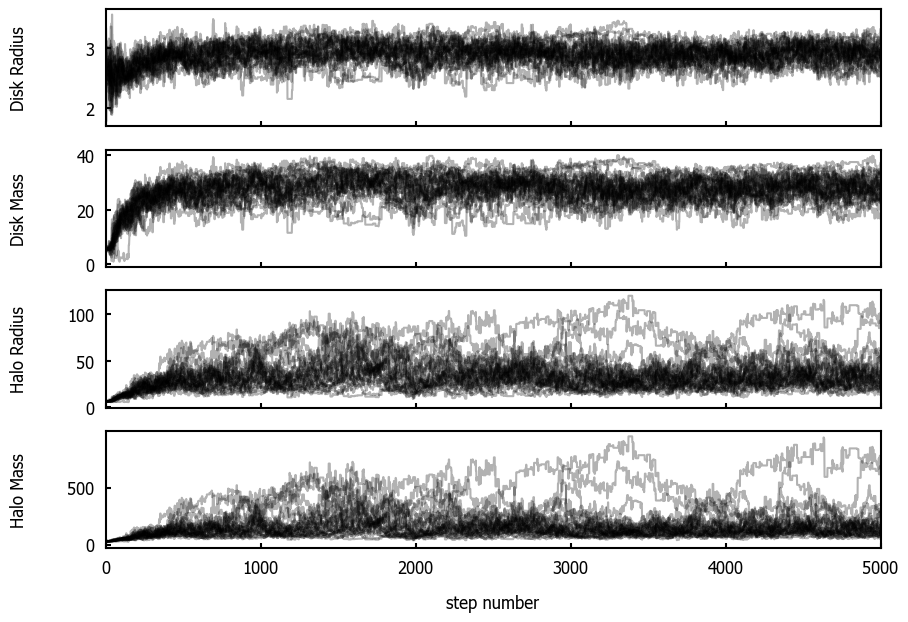

In [59]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["Disk Radius", "Disk Mass", "Halo Radius", "Halo Mass"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [60]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

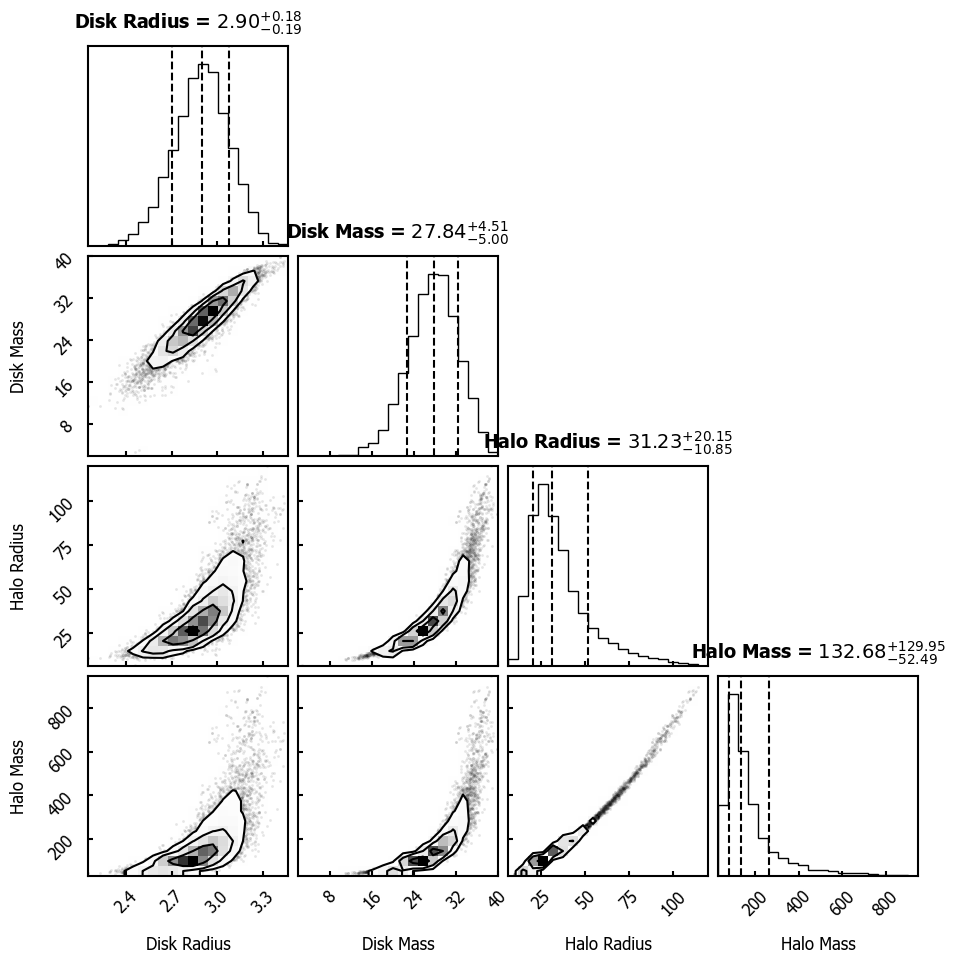

In [61]:
import corner

fig = corner.corner(
    flat_samples, labels=labels,
    quantiles=[0.15, 0.5, 0.84],
    show_titles=True
);

## ii) For MOND

The results of the MCMC algorithm will be relevant to our analysis of MOND, as we will use it to check for agreement in the value of acrit. MCMC is not really valuable for our analysis of the DM model.

### a) Define Necessary Functions:

In [62]:
def chi2_mond(x, y, err, Rd, Md, acrit):
    # Calculate chi-squared
    chi2 = 0.0
    model = mondmodel(x, Rd, Md, acrit)
    for i in np.arange(0, len(y)):
        # residuals:
        res = y[i] - model[i] 
        chi2 += (res/err[i])**2
    return chi2

In [63]:
def log_prior_mond(params):
    '''
    Calculates the log prior, with
    the assumption that the prior 
    is log uniform.
    
    Args:
        params (arr) : array of free parameters, 
        [Rdisk, Mdisk, acrit]
        
    Returns:
        lp (int) : log-prior for the given parameters
        
    '''
    
    # log prior for disk radius -- log-uniform from 0 to 50 
    dr = params[0] # value of disk radius
    if dr <= 0 or dr >= 50:
        return - np.inf
    else:
        dr_min = 0.5
        dr_max = 50
        c = 1/np.log(dr_max/dr_min)
        drp = np.log(c/(dr))
    
    
    
    # log prior for disk mass -- log-uniform from 0 to 3000
    dm = params[1] # value of disk mass
    if dm <= 0 or dm >= 3000:
        return - np.inf
    else:
        dm_min = .1
        dm_max = 3000
        c = 1/np.log(dm_max/dm_min)
        dmp = np.log(c/(dm)) 



    # log prior for acrit -- log-uniform from 0.01 to 100
    ac = np.exp(params[2]) 
    if ac <= 0.1 or ac >= 20:
        return - np.inf
    else:
        ac_min = 0.1
        ac_max = 20
        c = 1/np.log(ac_max/ac_min)
        acp = np.log(c/(ac)) 
    

    
    # sum of the priors for all free parameters
    lp = drp + dmp + acp
    return lp

In [64]:
def log_like_mond(params, r_data, v_data, err):
    '''
    Calculates the log-likelihood value for 
    a given temperature and log factor
    
    Args:
        params (arr) : array of free parameters, [Rdisk, Mdisk, Rhalo, Mhalo]
        
        r_data (arr) : array of radius data
        
        v_data (arr) : array of velocity data
        
        err (arr) : estimated error
    
    Returns:
        log_like (int) : value of the log-likelihood given the parameters and data
    '''
    if params[0] < 0.5 or params[1] < 0.1 or np.exp(params[2]) < 0.1:
        return -np.inf
    if params[0] > 50 or params[1] > 3000 or np.exp(params[2]) > 20:
        return -np.inf
    c2 = chi2_mond(r_data, v_data, err, params[0], params[1], np.exp(params[2]))
    return -0.5*(c2)

In [65]:
def log_post_mond(params, x, y, err):
    if (log_like_mond(params, x, y, err) == -np.inf or log_prior_mond(params) == -np.inf):
        return -np.inf
    return log_like_mond(params, x, y, err) + log_prior_mond(params)

### b) Run Calculations:

#### NGC 3198

In [66]:
log_ac_med = [] # list of median log-acrit values
log_ac_std = [] # list of log-acrit standard deviations

In [67]:
import emcee

nwalkers = 50
ndim =  3
pos = [[np.random.normal(params_3198_mond[0], 0.25), \
        np.random.normal(params_3198_mond[1], 0.1), \
        np.random.normal(np.log(params_3198_mond[2]), 0.1)] for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_post_mond, \
    args=(data_3198[:,0], data_3198[:,1], data_3198[:,2])
)

sampler.run_mcmc(pos, 10000, progress=True);

100%|█████████████████████████████████████| 10000/10000 [05:55<00:00, 28.14it/s]


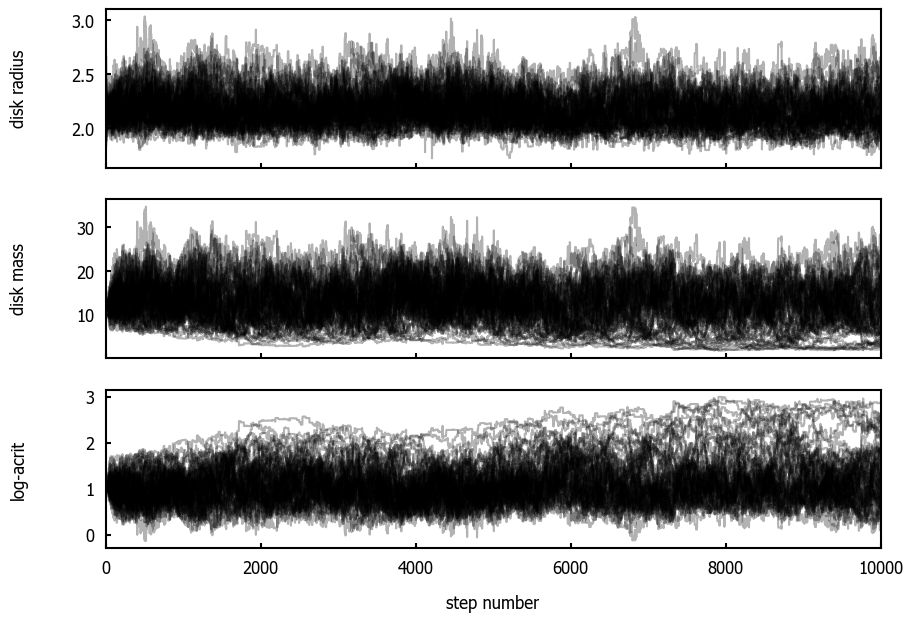

In [68]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["disk radius", "disk mass", "log-acrit"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [69]:
samples_3198 = sampler.get_chain(discard=500, thin=15, flat=True)

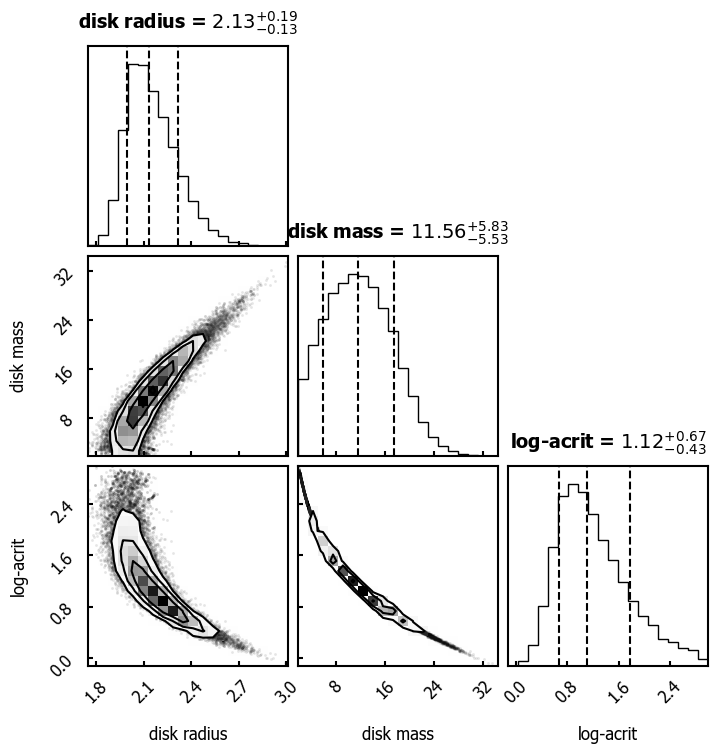

In [70]:
import corner

fig = corner.corner(
    samples_3198, labels=labels,
    quantiles=[0.15, 0.5, 0.84],
    show_titles=True
);

In [71]:
ac_med_3198 = np.median(samples[:, :, 2]) # acrit median value
ac_std_3198 = np.std(samples[:, :, 2]) # acrit standard deviation
log_ac_med.append(ac_med_3198)
log_ac_std.append(ac_std_3198)

#### NGC 2403: 

In [72]:
nwalkers = 50
ndim =  3
pos = [[np.random.normal(params_2403_mond[0], 0.25), \
        np.random.normal(params_2403_mond[1], 0.1), \
        np.random.normal(np.log(params_2403_mond[2]), 0.1)] for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_post_mond, \
    args=(data_2403[:,0], data_2403[:,1], data_2403[:,2])
)

sampler.run_mcmc(pos, 10000, progress=True);

100%|█████████████████████████████████████| 10000/10000 [07:09<00:00, 23.30it/s]


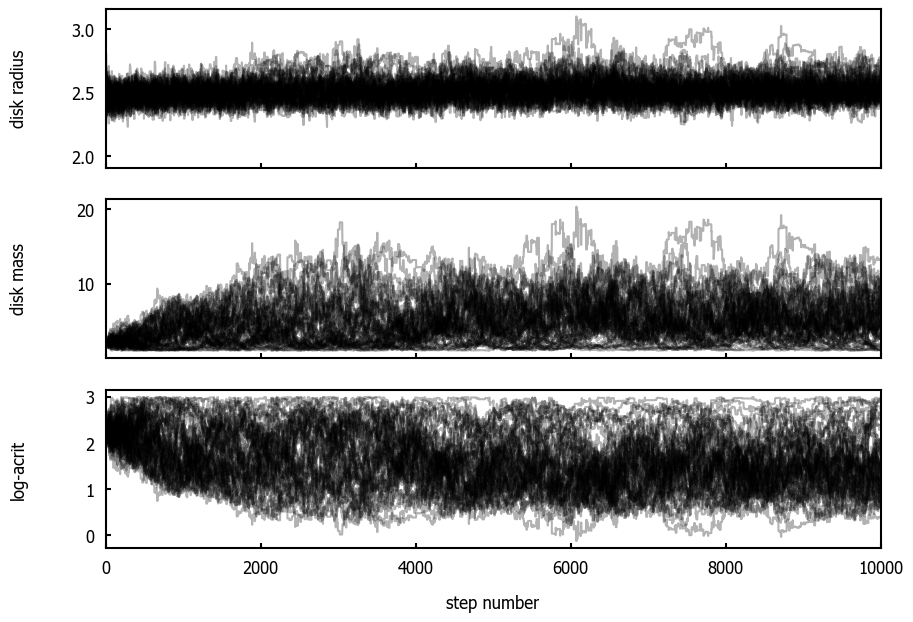

In [73]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["disk radius", "disk mass", "log-acrit"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [74]:
samples_2403 = sampler.get_chain(discard=100, thin=15, flat=True)

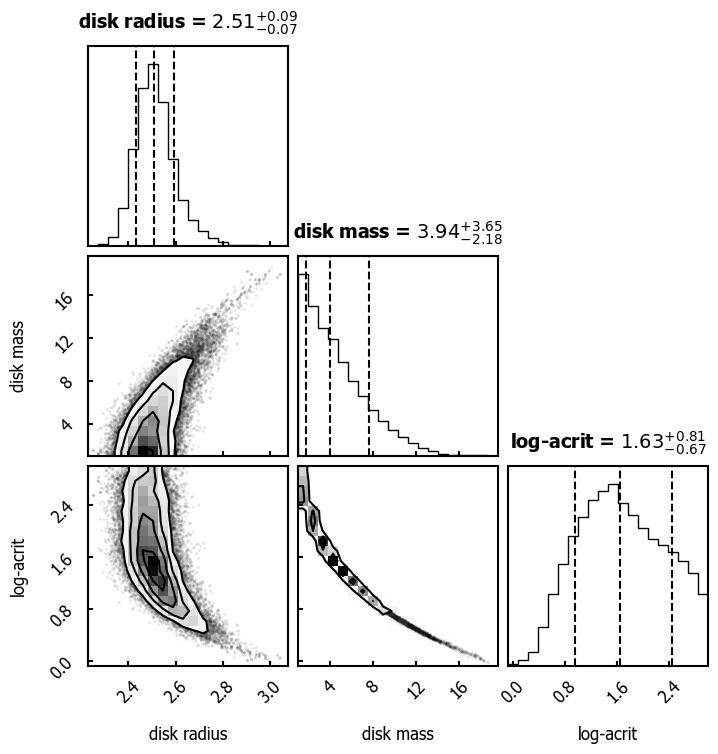

In [75]:
fig = corner.corner(
    samples_2403, labels=labels,
    quantiles=[0.15, 0.5, 0.84],
    show_titles=True
);

In [76]:
ac_med_2403 = np.median(samples[:, :, 2]) # log-acrit median value
ac_std_2403 = np.std(samples[:, :, 2]) # log-acrit standard deviation
log_ac_med.append(ac_med_2403)
log_ac_std.append(ac_std_2403)

#### NGC 300: 

In [77]:
nwalkers = 50
ndim =  3
pos = [[np.random.normal(params_300_mond[0], 0.25), \
        np.random.normal(params_300_mond[1], 0.1), \
        np.random.normal(np.log(params_300_mond[2]), 0.1)] for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_post_mond, \
    args=(rdata_300, vdata_300, err_300)
)

sampler.run_mcmc(pos, 10000, progress=True);

100%|█████████████████████████████████████| 10000/10000 [06:20<00:00, 26.29it/s]


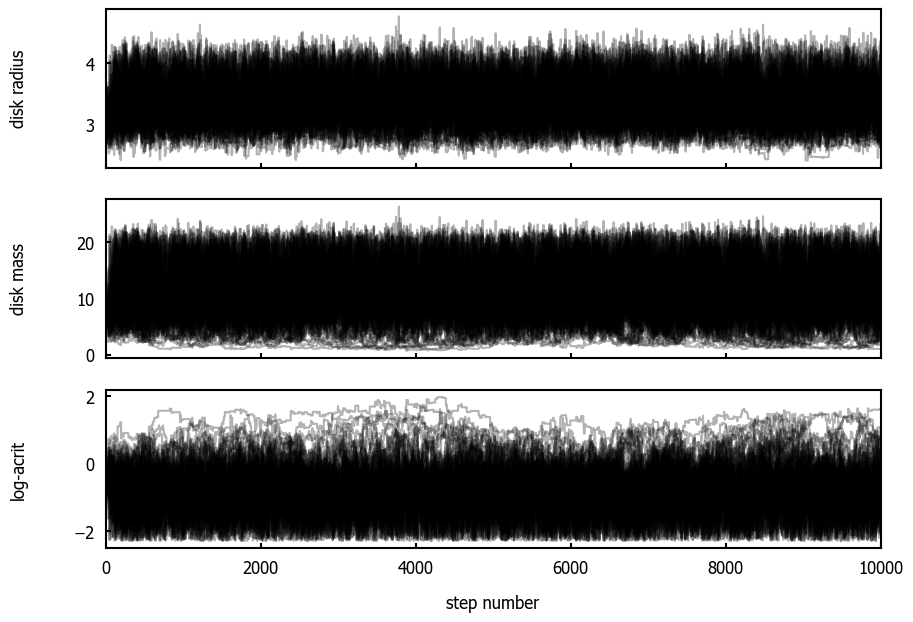

In [78]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["disk radius", "disk mass", "log-acrit"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

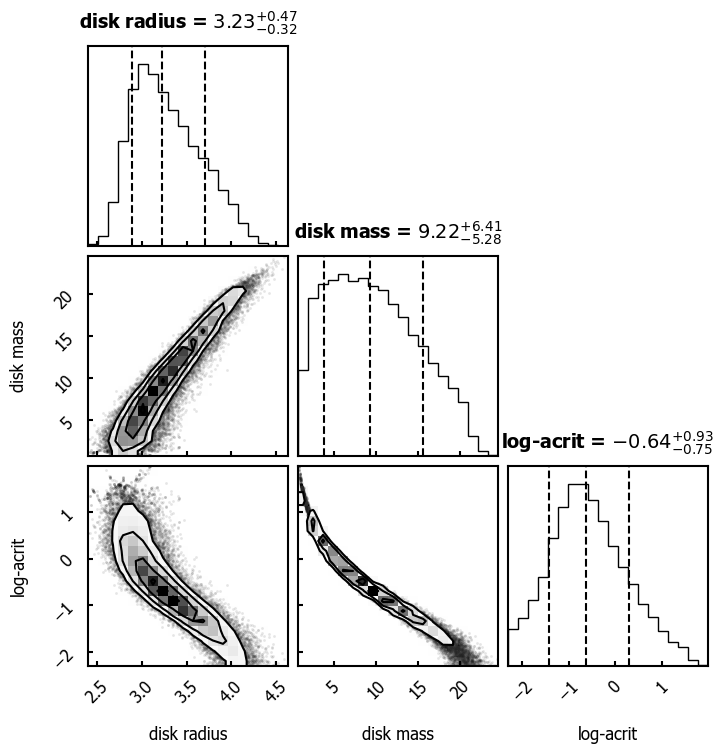

In [79]:
samples_300 = sampler.get_chain(discard=100, thin=15, flat=True)

fig = corner.corner(
    samples_300, labels=labels,
    quantiles=[0.15, 0.5, 0.84],
    show_titles=True
);

In [80]:
ac_med_300 = np.median(samples[:, :, 2]) # log-acrit median value
ac_std_300 = np.std(samples[:, :, 2]) # log-acrit standard deviation
log_ac_med.append(ac_med_300)
log_ac_std.append(ac_std_300)

#### NGC 24: 

In [81]:
nwalkers = 50
ndim =  3
pos = [[np.random.normal(params_24_mond[0], 0.25), \
        np.random.normal(params_24_mond[1], 0.1), \
        np.random.normal(np.log(params_24_mond[2]), 0.1)] for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_post_mond, \
    args=(rdata_24, vdata_24, err_24)
)

sampler.run_mcmc(pos, 10000, progress=True);

100%|█████████████████████████████████████| 10000/10000 [09:34<00:00, 17.41it/s]


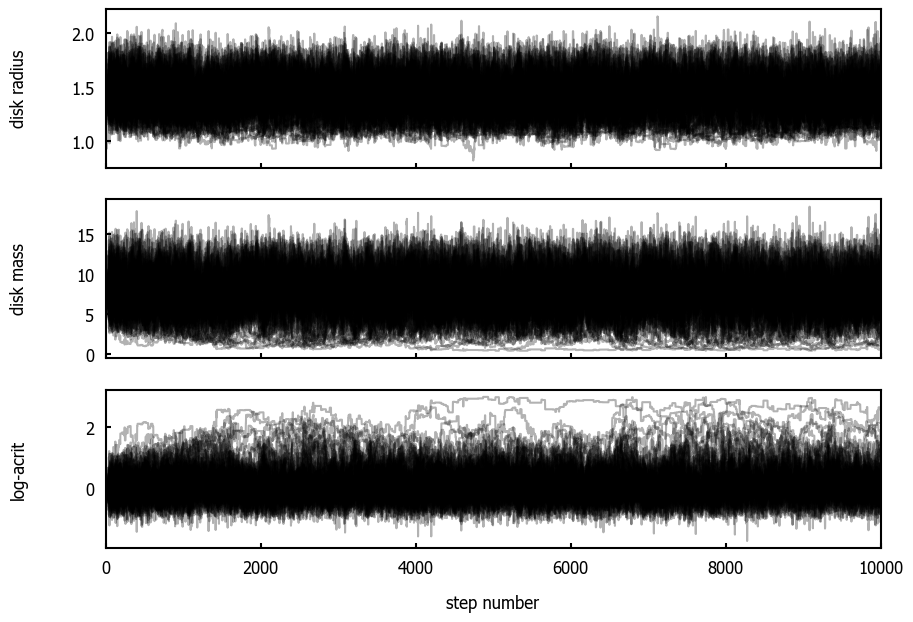

In [82]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["disk radius", "disk mass", "log-acrit"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

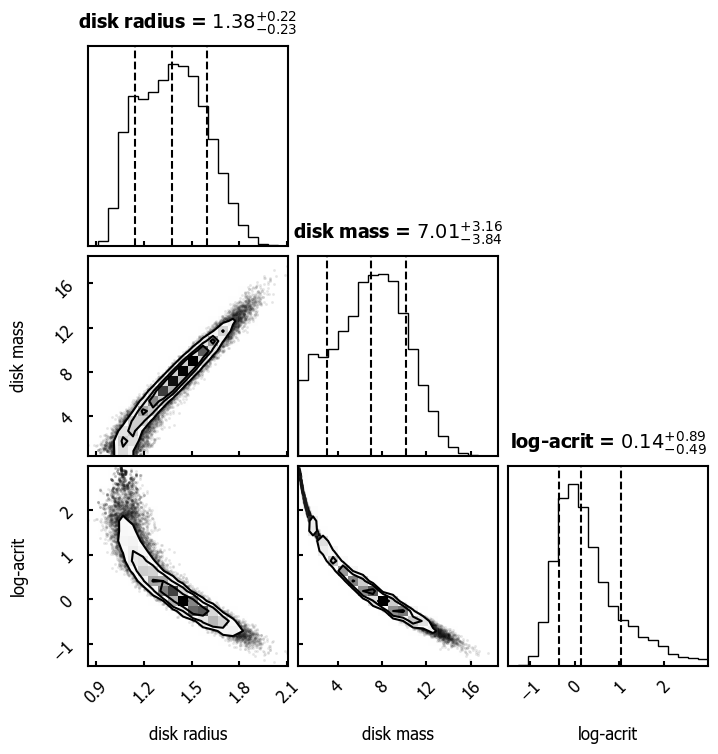

In [83]:
samples_24 = sampler.get_chain(discard=100, thin=15, flat=True)

fig = corner.corner(
    samples_24, labels=labels,
    quantiles=[0.15, 0.5, 0.84],
    show_titles=True
);

In [84]:
ac_med_24 = np.median(samples[:, :, 2]) # log-acrit median value
ac_std_24 = np.std(samples[:, :, 2]) # log-acrit standard deviation
log_ac_med.append(ac_med_24)
log_ac_std.append(ac_std_24)

#### NGC 1003: 

In [85]:
nwalkers = 50
ndim =  3
pos = [[np.random.normal(params_2976_mond[0], 1), \
        np.random.normal(params_2976_mond[1], 1), \
        np.random.normal(np.log(params_2976_mond[2]), 0.5)] for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_post_mond, \
    args=(rdata_2976, vdata_2976, err_2976)
)

sampler.run_mcmc(pos, 10000, progress=True);

100%|█████████████████████████████████████| 10000/10000 [11:01<00:00, 15.11it/s]


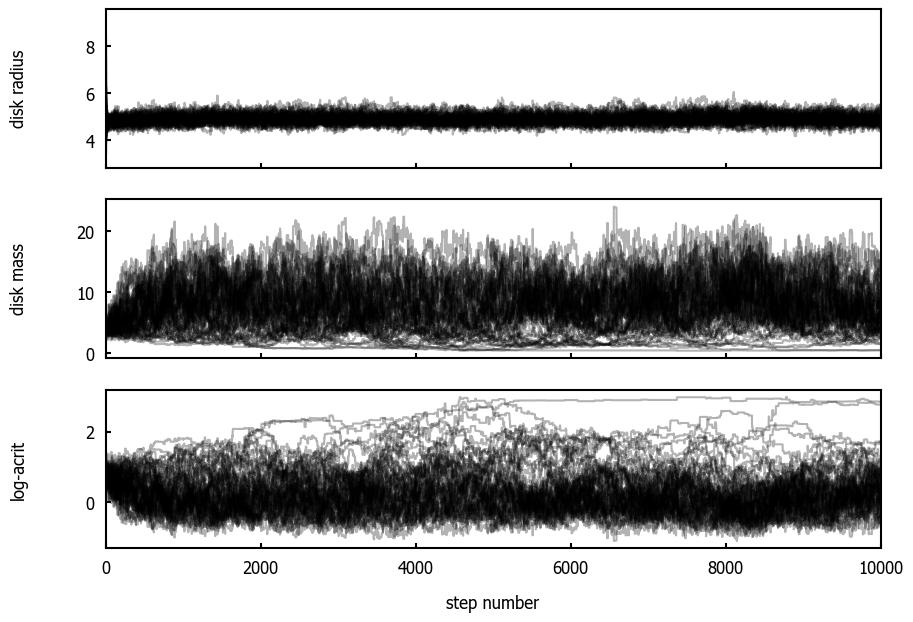

In [86]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["disk radius", "disk mass", "log-acrit"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

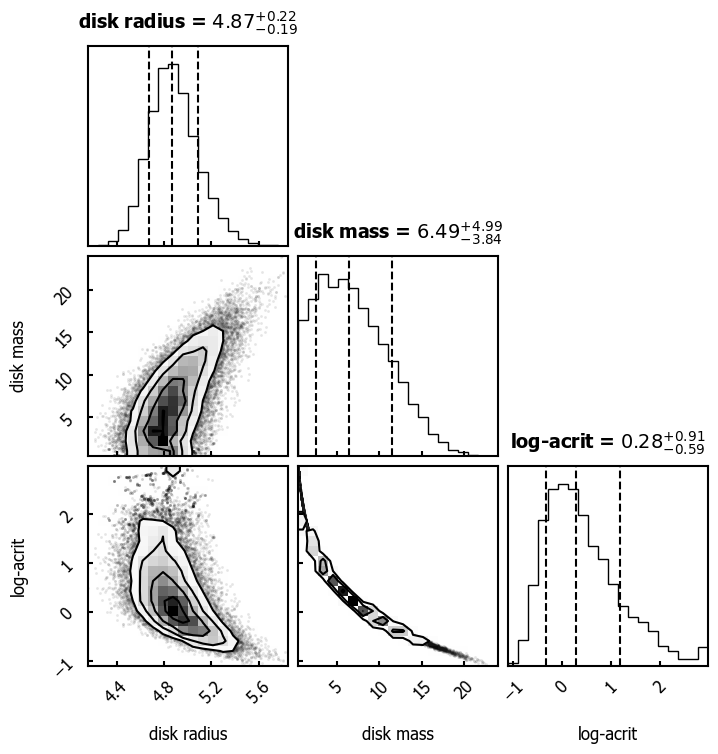

In [87]:
samples_2976 = sampler.get_chain(discard=100, thin=15, flat=True)

fig = corner.corner(
    samples_2976, labels=labels,
    quantiles=[0.15, 0.5, 0.84],
    show_titles=True
);

In [88]:
ac_med_2976 = np.median(samples[:, :, 2]) # log-acrit median value
ac_std_2976 = np.std(samples[:, :, 2]) # log-acrit standard deviation
log_ac_med.append(ac_med_2976)
log_ac_std.append(ac_std_2976)

#### NGC 2903: 

In [132]:
nwalkers = 50
ndim =  3
pos = [[np.random.normal(params_2903_mond[0], 0.25), \
        np.random.normal(params_2903_mond[1], 0.1), \
        np.random.normal(np.log(params_2903_mond[2]), 0.1)] for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_post_mond, \
    args=(rdata_2903, vdata_2903, err_2903)
)

sampler.run_mcmc(pos, 10000, progress=True);

100%|█████████████████████████████████████| 10000/10000 [08:42<00:00, 19.13it/s]


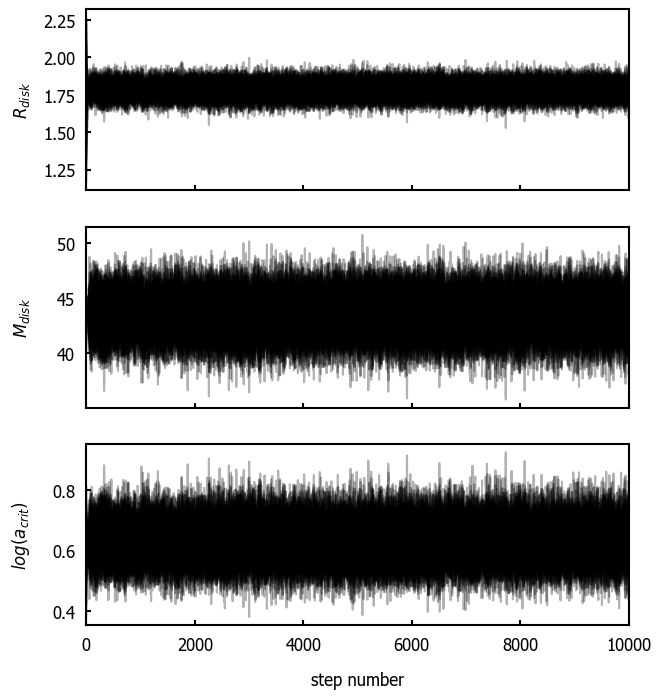

In [155]:
fig, axes = plt.subplots(3, figsize=(7, 8), sharex=True)
#samples = sampler.get_chain()
labels = ["$R_{disk}$", "$M_{disk}$", "$log(a_{crit})$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
plt.savefig("mix.svg", format="svg")

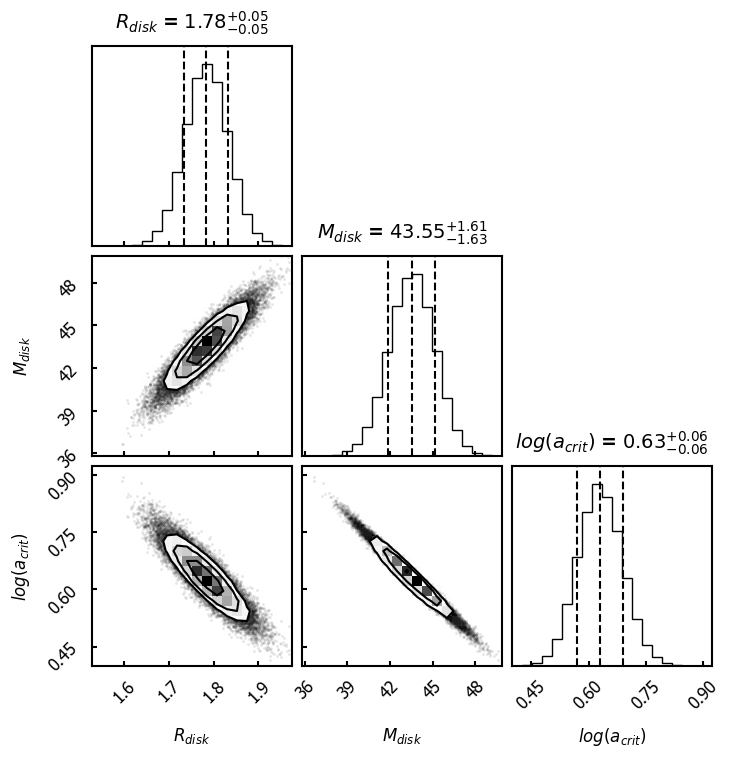

In [156]:
#samples_2903 = sampler.get_chain(discard=100, thin=15, flat=True)

fig = corner.corner(
    samples_2903, labels=labels,
    quantiles=[0.15, 0.5, 0.84],
    show_titles=True
);
plt.savefig("corner.svg", format="svg")

In [135]:
ac_med_2903 = np.median(samples[:, :, 2]) # log-acrit median value
ac_std_2903 = np.std(samples[:, :, 2]) # log-acrit standard deviation
log_ac_med.append(ac_med_2903)
log_ac_std.append(ac_std_2903)

#### NGC 2998: 

In [93]:
nwalkers = 50
ndim =  3
pos = [[np.random.normal(params_2998_mond[0], 0.25), \
        np.random.normal(params_2998_mond[1], 0.1), \
        np.random.normal(np.log(params_2998_mond[2]), 0.1)] for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_post_mond, \
    args=(rdata_2998, vdata_2998, err_2998)
)

sampler.run_mcmc(pos, 10000, progress=True);

100%|█████████████████████████████████████| 10000/10000 [04:33<00:00, 36.59it/s]


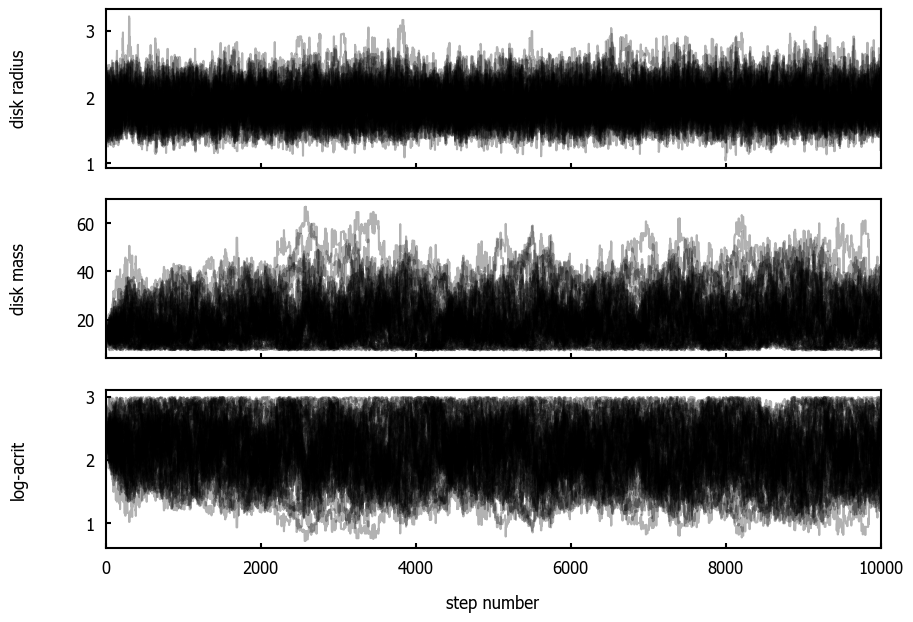

In [94]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["disk radius", "disk mass", "log-acrit"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

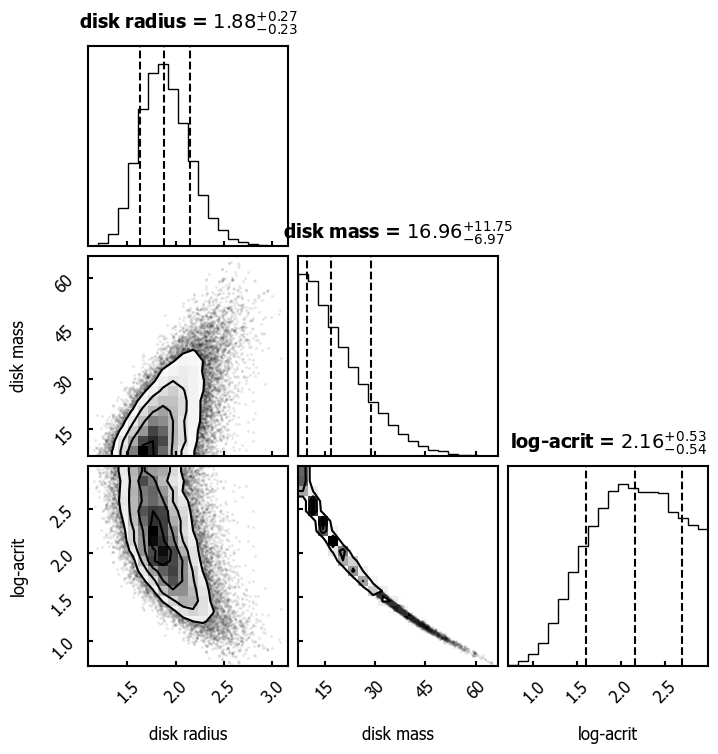

In [95]:
samples_2998 = sampler.get_chain(discard=100, thin=15, flat=True)

fig = corner.corner(
    samples_2998, labels=labels,
    quantiles=[0.15, 0.5, 0.84],
    show_titles=True
);

In [96]:
ac_med_2998 = np.median(samples[:, :, 2]) # log-acrit median value
ac_std_2998 = np.std(samples[:, :, 2]) # log-acrit standard deviation
log_ac_med.append(ac_med_2998)
log_ac_std.append(ac_std_2998)

#### NGC 2915: 

In [97]:
nwalkers = 50
ndim =  3
pos = [[np.random.normal(params_55_mond[0], 0.25), \
        np.random.normal(params_55_mond[1], 0.1), \
        np.random.normal(np.log(params_55_mond[2]), 0.1)] for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_post_mond, \
    args=(rdata_55, vdata_55, err_55)
)

sampler.run_mcmc(pos, 10000, progress=True);

100%|█████████████████████████████████████| 10000/10000 [10:38<00:00, 15.65it/s]


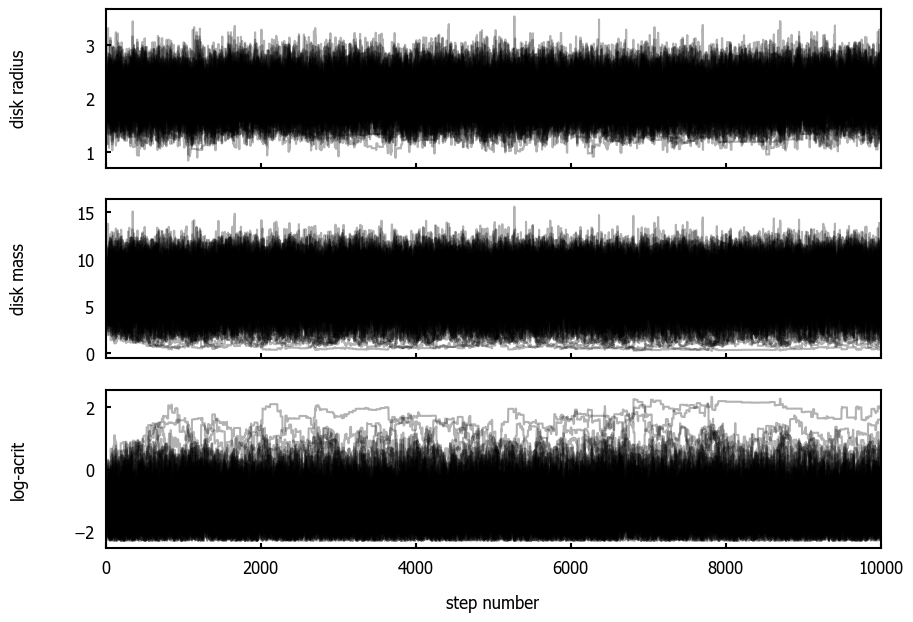

In [98]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["disk radius", "disk mass", "log-acrit"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

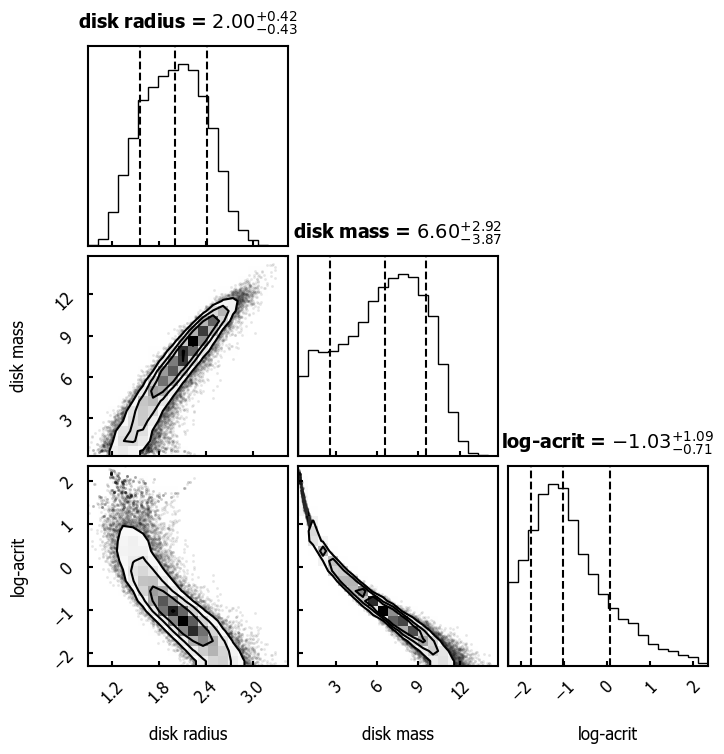

In [99]:
samples_55 = sampler.get_chain(discard=100, thin=15, flat=True)

fig = corner.corner(
    samples_55, labels=labels,
    quantiles=[0.15, 0.5, 0.84],
    show_titles=True
);

In [100]:
ac_med_55 = np.median(samples[:, :, 2]) # log-acrit median value
ac_std_55 = np.std(samples[:, :, 2]) # log-acrit standard deviation
log_ac_med.append(ac_med_55)
log_ac_std.append(ac_std_55)

### c) Analysis on acrit:

In [101]:
# median acrit values:
ac_med = np.exp(log_ac_med)

# standard deviation of acrit median values:
std = np.std(ac_med)

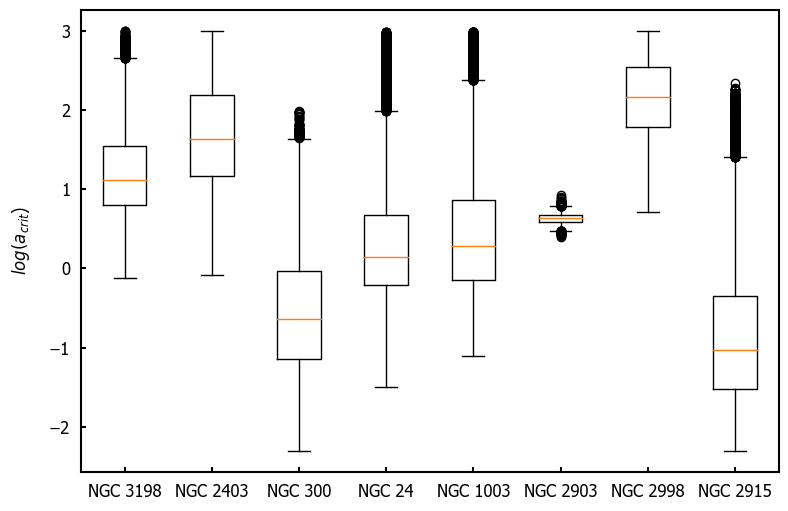

In [160]:
data = [samples_3198[:, 2], samples_2403[:, 2], samples_300[:, 2], samples_24[:, 2],
        samples_2976[:, 2], samples_2903[:, 2], samples_2998[:, 2], samples_55[:, 2]]

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['NGC 3198', 'NGC 2403', 'NGC 300', 'NGC 24', 'NGC 1003', 'NGC 2903', 'NGC 2998', 'NGC 2915'])
#ax.set_title('Box plot of $a_{crit}$ values')
ax.set_ylabel('$log(a_{crit}$)')
plt.savefig("box.svg", format="svg")
plt.show()


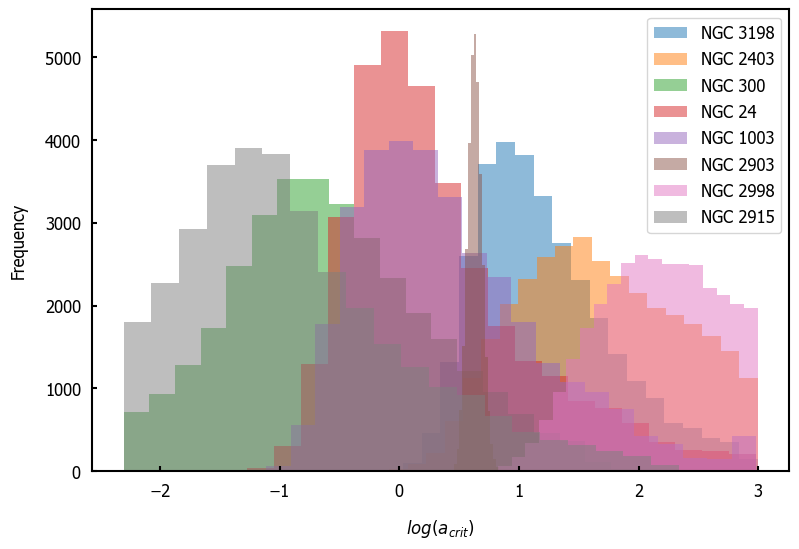

In [128]:
# Overlapping Histograms:

fig, ax = plt.subplots()

ax.hist(samples_3198[:,2], bins=20, alpha=0.5, label='NGC 3198')
ax.hist(samples_2403[:,2], bins=20, alpha=0.5, label='NGC 2403')
ax.hist(samples_300[:,2], bins=20, alpha=0.5, label='NGC 300')
ax.hist(samples_24[:,2], bins=20, alpha=0.5, label='NGC 24')
ax.hist(samples_2976[:,2], bins=20, alpha=0.5, label='NGC 1003')
ax.hist(samples_2903[:,2], bins=20, alpha=0.5, label='NGC 2903')
ax.hist(samples_2998[:,2], bins=20, alpha=0.5, label='NGC 2998')
ax.hist(samples_55[:,2], bins=20, alpha=0.5, label='NGC 2915')

# Add axis labels and legend
ax.set_xlabel('$log(a_{crit})$')
ax.set_ylabel('Frequency')
ax.legend()

# Show the plot
plt.show()

In [104]:
'''
Kruskal-Wallis H test :

Used to compare the medians
of the distributions to see
if they are significantly
different

Returns a p-value
'''

from scipy.stats.mstats import kruskalwallis as kruskal

H, p = kruskal(samples_3198[:,2], samples_2403[:,2], samples_300[:,2], \
               samples_24[:,2], samples_2976[:,2], samples_2903[:,2], \
               samples_2998[:,2], samples_55[:,2])

print("Kruskal-Wallis H statistic:", H)
print("p-value:", p)
if p < 0.05:
    print("Reject null hypothesis: galaxies have different median $a_{crit}$ values.")
else:
    print("Fail to reject null hypothesis: galaxies have similar median $a_{crit}$ values.")

Kruskal-Wallis H statistic: 180858.63338063046
p-value: 0.0
Reject null hypothesis: galaxies have different median $a_{crit}$ values.


In [105]:
import scipy.stats as stats

# perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(samples_3198[:,2], samples_2403[:,2], samples_300[:,2], \
               samples_24[:,2], samples_2976[:,2], samples_2903[:,2], \
               samples_2998[:,2], samples_55[:,2])

# print the results
print("F-statistic: ", f_statistic)
print("P-value: ", p_value)


F-statistic:  77810.29894490758
P-value:  0.0


# 4) Cross-Validation -- leave p out

In [106]:
def split_data(data, p):
    '''
    Splits data into training and validation set,
    with the validation set having p data points.
    
    The points in the validation set are randomly chosen.
    '''
    
    indices = np.random.choice(len(data), p, replace=False)
    training = np.delete(data, indices, axis=0)
    validation = data[indices]
    
    return training, validation

#### NGC 3198

[12, 988]


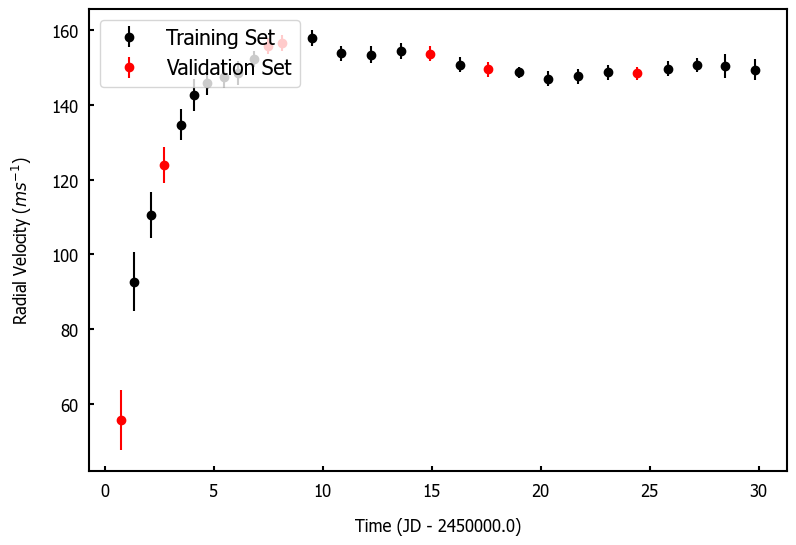

In [107]:
scores = [0, 0] # scores of models, ordered m0, mf, mg, mfg

p = int(len(data_3198) * 0.25) # leave out 25% of data

for i in np.arange(1000):

    t, v = split_data(data_3198, p) # split data into random training and validation sets
    
    # Bounds
    b1 = [[0.25, 2.5, 2.5, 4], [10, 24, 24, 30]] # bounds for dm
    b2 = [[0.25, 2.5, 0.2], [10, 24, 10]] # bounds for MOND
    
    # Calculate best fit parameters for each model, given the training data
    params_dm, _ = curve_fit(rotnmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b1)
    params_mond, _ = curve_fit(mondmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b2)

    # Calculate Chi-Squared
    chi2list = [] 
    chi2list.append(chi2_dm(v[:,0], v[:,1], v[:,2], params_dm[0], params_dm[1], params_dm[2], params_dm[3]))
    chi2list.append(chi2_mond(v[:,0], v[:,1], v[:,2], params_mond[0], params_mond[1], params_mond[2]))
 
    scores[chi2list.index(min(chi2list))] += 1
    
    if i == 50:
        plt.errorbar([va[0] for va in t], [va[1] for va in t], yerr = [va[2] for va in t], fmt='o', label='Training Set', c='black')
        plt.errorbar([va[0] for va in v], [va[1] for va in v], yerr = [va[2] for va in v], fmt='o', c='r', label='Validation Set')
        plt.xlabel('Time (JD - 2450000.0)')
        plt.ylabel('Radial Velocity ($m s^{-1}$)')
        plt.legend(loc='upper left', fontsize=15)
        
print(scores)
    
# Only calculate chi-squared because cross-validation already penalizes for complexity...

#### NGC 2403

Score for this NGC 2403: [962, 38]
Total Score: [974, 1026]


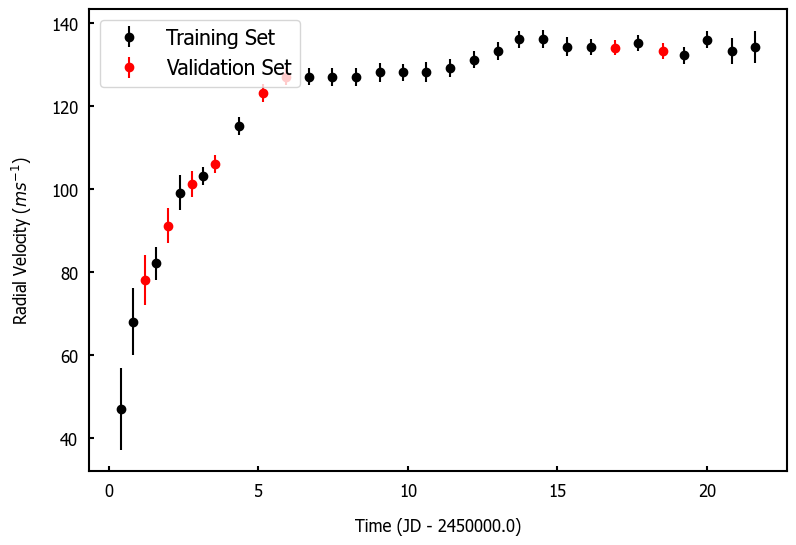

In [108]:
new_scores = [0, 0] # scores of models, ordered m0, mf, mg, mfg

p = int(len(data_2403) * 0.25) # leave out 25% of data

for i in np.arange(1000):

    t, v = split_data(data_2403, p) # split data into random training and validation sets
    
    b1 = [[0.25, 2.5, 2.5, 4], [10, 24, 24, 30]] # bounds for dm
    b2 = [[0.25, 2.5, 0.2], [10, 24, 10]] # bounds for MOND
    
    # Calculate best fit parameters for each model, given the training data
    params_dm, _ = curve_fit(rotnmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b1)
    params_mond, _ = curve_fit(mondmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b2)

    # Calculate Chi-Squared
    chi2list = [] 
    chi2list.append(chi2_dm(v[:,0], v[:,1], v[:,2], params_dm[0], params_dm[1], params_dm[2], params_dm[3]))
    chi2list.append(chi2_mond(v[:,0], v[:,1], v[:,2], params_mond[0], params_mond[1], params_mond[2]))
 
    new_scores[chi2list.index(min(chi2list))] += 1
    
    if i == 50:
        plt.errorbar([va[0] for va in t], [va[1] for va in t], yerr = [va[2] for va in t], fmt='o', label='Training Set', c='black')
        plt.errorbar([va[0] for va in v], [va[1] for va in v], yerr = [va[2] for va in v], fmt='o', c='r', label='Validation Set')
        plt.xlabel('Time (JD - 2450000.0)')
        plt.ylabel('Radial Velocity ($m s^{-1}$)')
        plt.legend(loc='upper left', fontsize=15)

# Update Scores
scores[0] += new_scores[0]
scores[1] += new_scores[1]

# Print Scores
print(f'Score for this NGC 2403: {new_scores}')
print(f'Total Score: {scores}')
    
# Only calculate chi-squared because cross-validation already penalizes for complexity...

#### NGC 300

Score for this NGC 300: [315, 685]
Total Score: [1289, 1711]


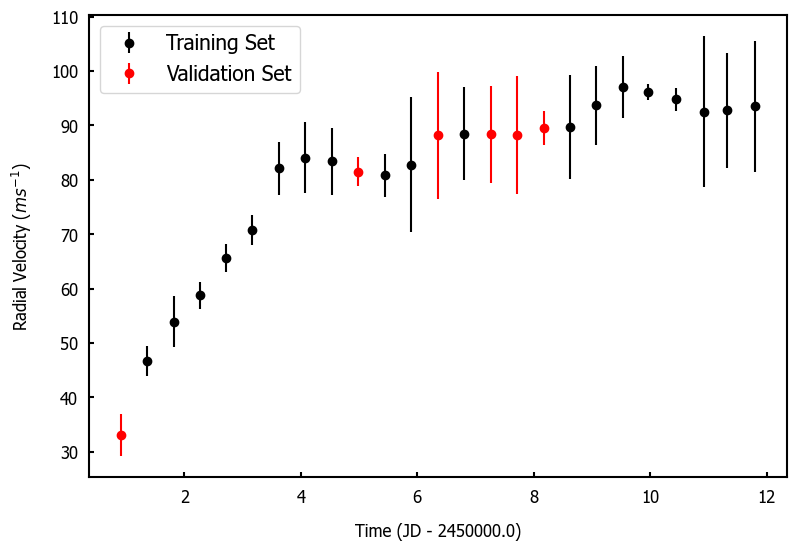

In [109]:
new_scores = [0, 0] # scores of models, ordered m0, mf, mg, mfg

# reformat data
data_300 = []
for i in range(0, len(rdata_300)):
    data_300.append([rdata_300[i], vdata_300[i], err_300[i]])
    
p = int(len(data_300) * 0.25) # leave out 25% of data

for i in np.arange(1000):

    t, v = split_data(np.array(data_300), p) # split data into random training and validation sets
    
    # Bounds
    b1 = [[0.25, 2.5, 2.5, 4], [10, 24, 24, 30]] # bounds for dm
    b2 = [[0.25, 2.5, 0.2], [10, 24, 10]] # bounds for MOND
    
    # Calculate best fit parameters for each model, given the training data
    params_dm, _ = curve_fit(rotnmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b1)
    params_mond, _ = curve_fit(mondmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b2)

    # Calculate Chi-Squared
    chi2list = [] 
    chi2list.append(chi2_dm(v[:,0], v[:,1], v[:,2], params_dm[0], params_dm[1], params_dm[2], params_dm[3]))
    chi2list.append(chi2_mond(v[:,0], v[:,1], v[:,2], params_mond[0], params_mond[1], params_mond[2]))
 
    new_scores[chi2list.index(min(chi2list))] += 1
    
    if i == 50:
        plt.errorbar([va[0] for va in t], [va[1] for va in t], yerr = [va[2] for va in t], fmt='o', label='Training Set', c='black')
        plt.errorbar([va[0] for va in v], [va[1] for va in v], yerr = [va[2] for va in v], fmt='o', c='r', label='Validation Set')
        plt.xlabel('Time (JD - 2450000.0)')
        plt.ylabel('Radial Velocity ($m s^{-1}$)')
        plt.legend(loc='upper left', fontsize=15)

# Update Scores
scores[0] += new_scores[0]
scores[1] += new_scores[1]

# Print Scores
print(f'Score for this NGC 300: {new_scores}')
print(f'Total Score: {scores}')
    
# Only calculate chi-squared because cross-validation already penalizes for complexity...

#### NGC 24

Score for this NGC 24: [575, 425]
Total Score: [1864, 2136]


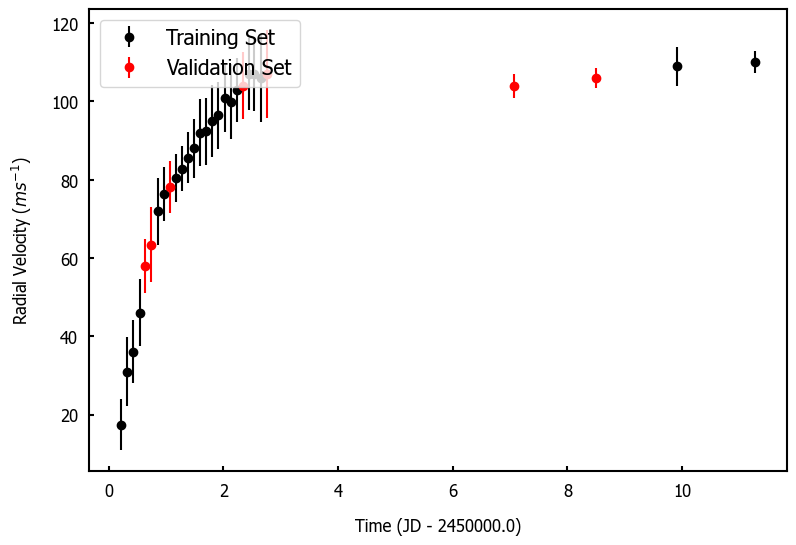

In [110]:
new_scores = [0, 0] # scores of models, ordered m0, mf, mg, mfg

# reformat data
data_24 = []
for i in range(0, len(rdata_24)):
    data_24.append([rdata_24[i], vdata_24[i], err_24[i]])
    
p = int(len(data_24) * 0.25) # leave out 25% of data

for i in np.arange(1000):

    t, v = split_data(np.array(data_24), p) # split data into random training and validation sets
    
    # Bounds
    b1 = [[0.25, 2.5, 2.5, 4], [10, 24, 24, 30]] # bounds for dm
    b2 = [[0.25, 2.5, 0.2], [10, 24, 10]] # bounds for MOND
    
    # Calculate best fit parameters for each model, given the training data
    params_dm, _ = curve_fit(rotnmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b1)
    params_mond, _ = curve_fit(mondmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b2)

    # Calculate Chi-Squared
    chi2list = []
    chi2list.append(chi2_dm(v[:,0], v[:,1], v[:,2], params_dm[0], params_dm[1], params_dm[2], params_dm[3]))
    chi2list.append(chi2_mond(v[:,0], v[:,1], v[:,2], params_mond[0], params_mond[1], params_mond[2]))
 
    new_scores[chi2list.index(min(chi2list))] += 1
    
    if i == 50:
        plt.errorbar([va[0] for va in t], [va[1] for va in t], yerr = [va[2] for va in t], fmt='o', label='Training Set', c='black')
        plt.errorbar([va[0] for va in v], [va[1] for va in v], yerr = [va[2] for va in v], fmt='o', c='r', label='Validation Set')
        plt.xlabel('Time (JD - 2450000.0)')
        plt.ylabel('Radial Velocity ($m s^{-1}$)')
        plt.legend(loc='upper left', fontsize=15)

# Update Scores
scores[0] += new_scores[0]
scores[1] += new_scores[1]

# Print Scores
print(f'Score for this NGC 24: {new_scores}')
print(f'Total Score: {scores}')
    
# Only calculate chi-squared because cross-validation already penalizes for complexity...

#### NGC 1003

Score for this NGC 2976: [1000, 0]
Total Score: [7336, 3664]


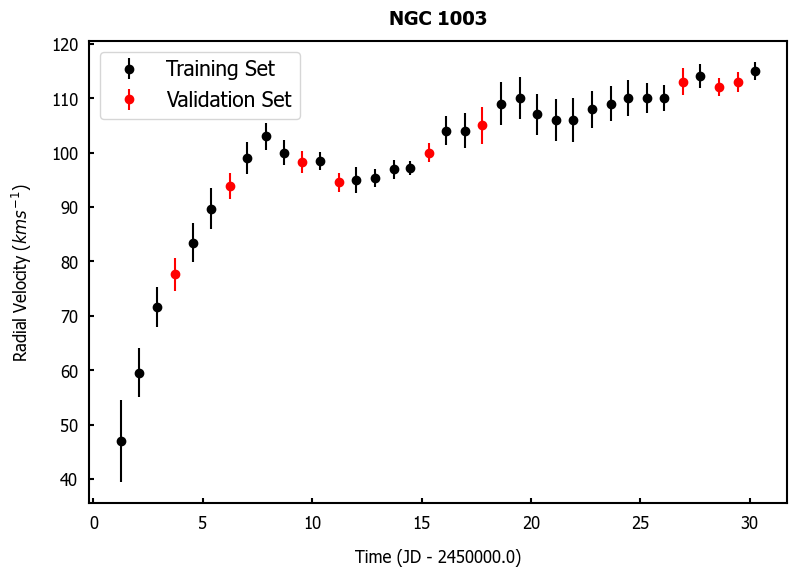

In [158]:
new_scores = [0, 0] # scores of models, ordered m0, mf, mg, mfg

# reformat data
data_2976 = []
for i in range(0, len(rdata_2976)):
    data_2976.append([rdata_2976[i], vdata_2976[i], err_2976[i]])
    
p = int(len(data_2976) * 0.25) # leave out 25% of data

for i in np.arange(1000):

    t, v = split_data(np.array(data_2976), p) # split data into random training and validation sets
    
    # Bounds
    b1 = [[0.25, 2.5, 2.5, 4], [10, 24, 24, 30]] # bounds for dm
    b2 = [[0.25, 2.5, 0.2], [10, 24, 10]] # bounds for MOND
    
    # Calculate best fit parameters for each model, given the training data
    params_dm, _ = curve_fit(rotnmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b1)
    params_mond, _ = curve_fit(mondmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b2)
    
    # Calculate Chi-Squared
    chi2list = [] 
    chi2list.append(chi2_dm(v[:,0], v[:,1], v[:,2], params_dm[0], params_dm[1], params_dm[2], params_dm[3]))
    chi2list.append(chi2_mond(v[:,0], v[:,1], v[:,2], params_mond[0], params_mond[1], params_mond[2]))
 
    new_scores[chi2list.index(min(chi2list))] += 1
    
    if i == 50:
        plt.errorbar([va[0] for va in t], [va[1] for va in t], yerr = [va[2] for va in t], fmt='o', label='Training Set', c='black')
        plt.errorbar([va[0] for va in v], [va[1] for va in v], yerr = [va[2] for va in v], fmt='o', c='r', label='Validation Set')
        plt.xlabel('Time (JD - 2450000.0)')
        plt.ylabel('Radial Velocity ($km s^{-1}$)')
        plt.title('NGC 1003')
        plt.legend(loc='upper left', fontsize=15)

# Update Scores
scores[0] += new_scores[0]
scores[1] += new_scores[1]

# Print Scores
print(f'Score for this NGC 2976: {new_scores}')
print(f'Total Score: {scores}')

plt.savefig("cross.svg", format="svg")
# Only calculate chi-squared because cross-validation already penalizes for complexity...

#### NGC 2903

Score for this NGC 2903: [814, 186]
Total Score: [3678, 2322]


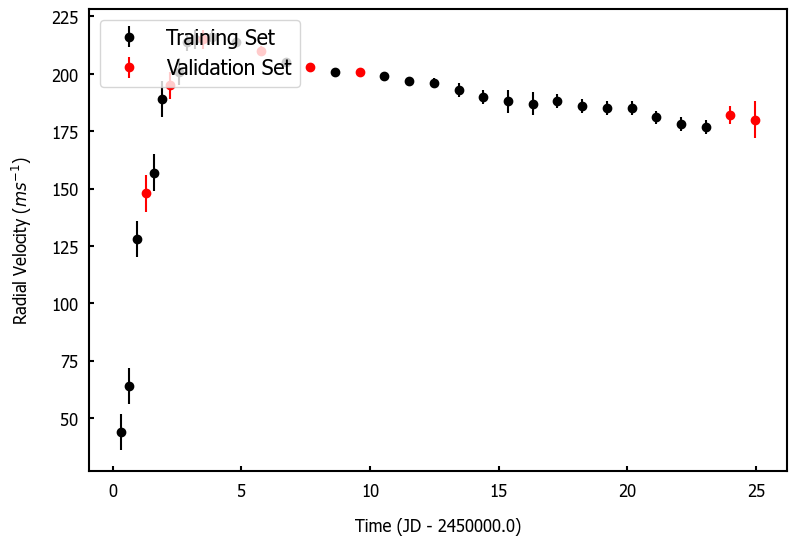

In [112]:
new_scores = [0, 0] # scores of models, ordered m0, mf, mg, mfg

# reformat data
data_2903 = []
for i in range(0, len(rdata_2903)):
    data_2903.append([rdata_2903[i], vdata_2903[i], err_2903[i]])
    
p = int(len(data_2903) * 0.25) # leave out 25% of data

for i in np.arange(1000):
    t, v = split_data(np.array(data_2903), p) # split data into random training and validation sets
    
    # Bounds
    b1 = [[0.25, 2.5, 2.5, 4], [10, 24, 24, 30]] # bounds for dm
    b2 = [[0.25, 2.5, 0.2], [10, 24, 10]] # bounds for MOND
    
    # Calculate best fit parameters for each model, given the training data
    params_dm, _ = curve_fit(rotnmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b1)
    params_mond, _ = curve_fit(mondmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b2)

    # Calculate Chi-Squared
    chi2list = [] 
    chi2list.append(chi2_dm(v[:,0], v[:,1], v[:,2], params_dm[0], params_dm[1], params_dm[2], params_dm[3]))
    chi2list.append(chi2_mond(v[:,0], v[:,1], v[:,2], params_mond[0], params_mond[1], params_mond[2]))
 
    new_scores[chi2list.index(min(chi2list))] += 1
    
    if i == 50:
        plt.errorbar([va[0] for va in t], [va[1] for va in t], yerr = [va[2] for va in t], fmt='o', label='Training Set', c='black')
        plt.errorbar([va[0] for va in v], [va[1] for va in v], yerr = [va[2] for va in v], fmt='o', c='r', label='Validation Set')
        plt.xlabel('Time (JD - 2450000.0)')
        plt.ylabel('Radial Velocity ($m s^{-1}$)')
        plt.legend(loc='upper left', fontsize=15)

# Update Scores
scores[0] += new_scores[0]
scores[1] += new_scores[1]

# Print Scores
print(f'Score for this NGC 2903: {new_scores}')
print(f'Total Score: {scores}')
    
# Only calculate chi-squared because cross-validation already penalizes for complexity...

#### NGC 2998

Score for this NGC 2998: [0, 1000]
Total Score: [3678, 3322]


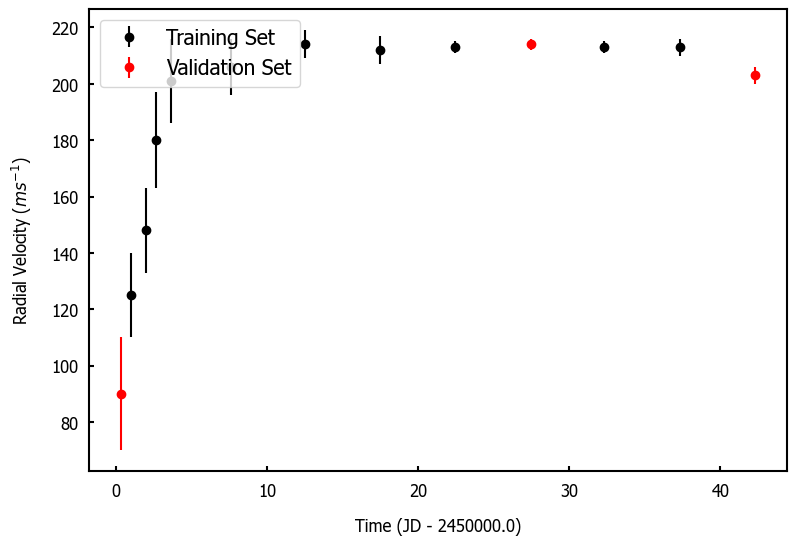

In [113]:
new_scores = [0, 0] # scores of models, ordered m0, mf, mg, mfg

# reformat data
data_2998 = []
for i in range(0, len(rdata_2998)):
    data_2998.append([rdata_2998[i], vdata_2998[i], err_2998[i]])
    
p = int(len(data_2998) * 0.25) # leave out 25% of data

for i in np.arange(1000):

    t, v = split_data(np.array(data_2998), p) # split data into random training and validation sets
    
    # Bounds
    b1 = [[0.25, 2.5, 2.5, 4], [10, 24, 24, 30]] # bounds for dm
    b2 = [[0.25, 2.5, 0.2], [10, 24, 10]] # bounds for MOND
    
    # Calculate best fit parameters for each model, given the training data
    params_dm, _ = curve_fit(rotnmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b1)
    params_mond, _ = curve_fit(mondmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b2)

    # Calculate Chi-Squared
    chi2list = []
    chi2list.append(chi2_dm(v[:,0], v[:,1], v[:,2], params_dm[0], params_dm[1], params_dm[2], params_dm[3]))
    chi2list.append(chi2_mond(v[:,0], v[:,1], v[:,2], params_mond[0], params_mond[1], params_mond[2]))
 
    new_scores[chi2list.index(min(chi2list))] += 1
    
    if i == 50:
        plt.errorbar([va[0] for va in t], [va[1] for va in t], yerr = [va[2] for va in t], fmt='o', label='Training Set', c='black')
        plt.errorbar([va[0] for va in v], [va[1] for va in v], yerr = [va[2] for va in v], fmt='o', c='r', label='Validation Set')
        plt.xlabel('Time (JD - 2450000.0)')
        plt.ylabel('Radial Velocity ($m s^{-1}$)')
        plt.legend(loc='upper left', fontsize=15)

# Update Scores
scores[0] += new_scores[0]
scores[1] += new_scores[1]

# Print Scores
print(f'Score for this NGC 2998: {new_scores}')
print(f'Total Score: {scores}')
    
# Only calculate chi-squared because cross-validation already penalizes for complexity...

#### NGC 2915

Score for this NGC 2915: [658, 342]
Final Score: [4336, 3664]


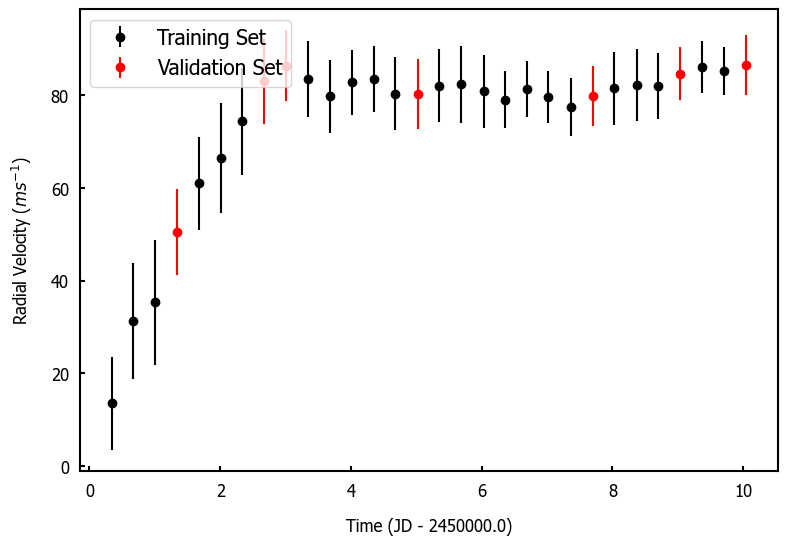

In [114]:
new_scores = [0, 0] # scores of models, ordered m0, mf, mg, mfg

# reformat data
data_55 = []
for i in range(0, len(rdata_55)):
    data_55.append([rdata_55[i], vdata_55[i], err_55[i]])
    
p = int(len(data_55) * 0.25) # leave out 25% of data

for i in np.arange(1000):

    t, v = split_data(np.array(data_55), p) # split data into random training and validation sets
    
    # Bounds
    b1 = [[0.25, 2.5, 2.5, 4], [10, 24, 24, 30]] # bounds for dm
    b2 = [[0.25, 2.5, 0.2], [10, 24, 10]] # bounds for MOND
    
    # Calculate best fit parameters for each model, given the training data
    params_dm, _ = curve_fit(rotnmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b1)
    params_mond, _ = curve_fit(mondmodel, t[:,0], t[:,1], sigma=t[:,2], bounds = b2)

    
    # Calculate Chi-Squared
    chi2list = []
    chi2list.append(chi2_dm(v[:,0], v[:,1], v[:,2], params_dm[0], params_dm[1], params_dm[2], params_dm[3]))
    chi2list.append(chi2_mond(v[:,0], v[:,1], v[:,2], params_mond[0], params_mond[1], params_mond[2]))
 
    new_scores[chi2list.index(min(chi2list))] += 1
    
    if i == 50:
        plt.errorbar([va[0] for va in t], [va[1] for va in t], yerr = [va[2] for va in t], fmt='o', label='Training Set', c='black')
        plt.errorbar([va[0] for va in v], [va[1] for va in v], yerr = [va[2] for va in v], fmt='o', c='r', label='Validation Set')
        plt.xlabel('Time (JD - 2450000.0)')
        plt.ylabel('Radial Velocity ($m s^{-1}$)')
        plt.legend(loc='upper left', fontsize=15)

# Update Scores
scores[0] += new_scores[0]
scores[1] += new_scores[1]

# Print Scores
print(f'Score for this NGC 2915: {new_scores}')
print(f'Final Score: {scores}')
    
# Only calculate chi-squared because cross-validation already penalizes for complexity...

In [115]:
'''
The final score printed above informs 
us that the DM model is favored
over MOND.
'''

# odds ratio of DM over MOND
odds_ratio = scores[0]/scores[1]
print(f'odds ratio = {odds_ratio}')

odds ratio = 1.1834061135371179
